### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.


The company is looking at prospective properties to buy to enter the market. Need to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

--Which variables are significant in predicting the price of a house, and

--How well those variables describe the price of a house.


In [1]:
## importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the dataset
HouseData = pd.read_csv("train.csv")

### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, treat null values,duplicates etc

In [3]:
HouseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
HouseData.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
HouseData.shape

(1460, 81)

In [6]:
# summary of the dataset: 1460 rows, 81 columns
print(HouseData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
## remove duplicates and keep first occurrences
HouseData=HouseData.drop_duplicates(keep='first', inplace=False)
print(HouseData.shape)

##Note: data has no duplicates

(1460, 81)


In [8]:
#Check the number of NAN values in the columns
HouseData.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
HouseData.isna().sum()/HouseData.shape[0]

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [10]:
## removing columns which have more than 30% NAN values
limit=len(HouseData)*0.7

In [11]:
df_clean=HouseData.dropna(thresh=limit,axis=1)

In [12]:
df_clean.shape
# Now 76 columns are remaining

(1460, 76)

In [13]:
print(df_clean.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64


treating the null values 

In [14]:
# get the columns with null values and their respective datatypes and null count
null_cols = []
for i in df_clean.columns:
    if df_clean[i].isnull().sum() > 0:
        print(i,df_clean[i].dtypes,df_clean[i].isnull().sum())        

LotFrontage float64 259
MasVnrType object 8
MasVnrArea float64 8
BsmtQual object 37
BsmtCond object 37
BsmtExposure object 38
BsmtFinType1 object 37
BsmtFinType2 object 38
Electrical object 1
GarageType object 81
GarageYrBlt float64 81
GarageFinish object 81
GarageQual object 81
GarageCond object 81


In [15]:
# treat null values for float values by replacing them with mean
null_cols2 = []
for i in df_clean.columns:
    if df_clean[i].dtypes == 'float64':
        if df_clean[i].isnull().sum() > 0:
            df_clean[i] = df_clean[i].replace(np.NaN, df_clean[i].mean())

In [16]:
# again get the features with null values
null_cols = []
for i in df_clean.columns:
    if df_clean[i].isnull().sum() > 0:
        print(i,df_clean[i].dtypes,df_clean[i].isnull().sum())    

MasVnrType object 8
BsmtQual object 37
BsmtCond object 37
BsmtExposure object 38
BsmtFinType1 object 37
BsmtFinType2 object 38
Electrical object 1
GarageType object 81
GarageFinish object 81
GarageQual object 81
GarageCond object 81


In [17]:
# getting columns with null values again after treating float columns
null_cols = [i for i in df_clean if df_clean[i].isnull().sum() > 0]
print([i for i in df_clean if df_clean[i].isnull().sum() > 0])

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [18]:
for i in null_cols:
    print(df_clean[i].unique())
    

['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [19]:
#  replacing the null values with mode
for i in null_cols:

    mode_val = df_clean[i].mode() 
    print(mode_val[0])
    df_clean[i] = df_clean[i].replace(np.NaN, mode_val[0])

None
TA
TA
No
Unf
Unf
SBrkr
Attchd
Unf
TA
TA


In [20]:
print(df_clean[i].isnull().sum().sum())

0


In [21]:
# dropping ID and other unnecessary columns
df_clean = df_clean.drop(['Id','YearBuilt', 'YearRemodAdd'], axis=1) 
df_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### 2: Visualising the Data


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


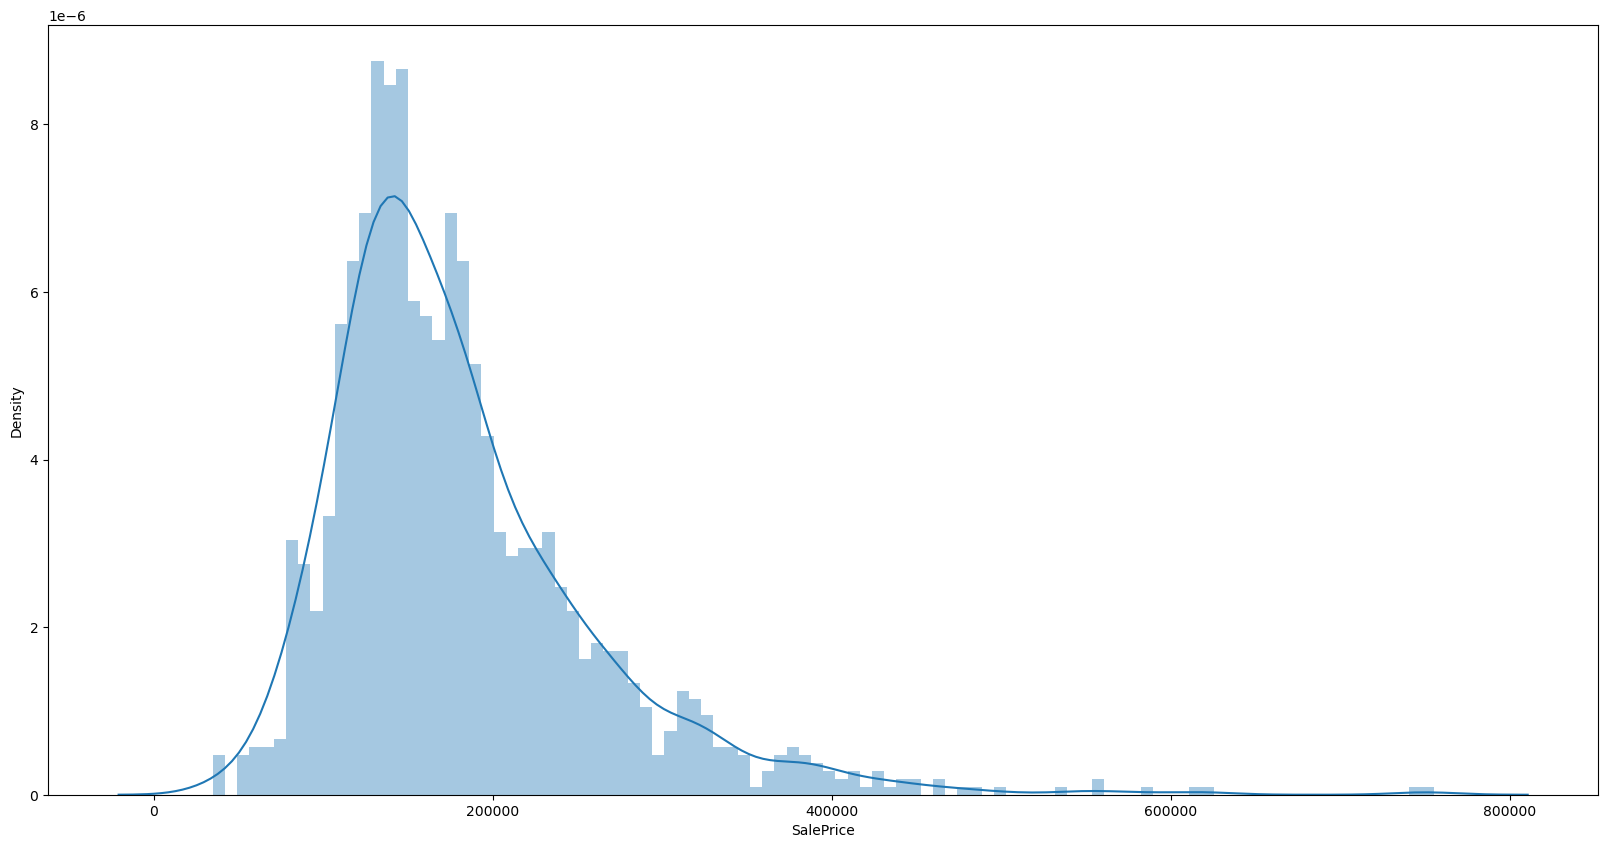

In [22]:
# Let's take a look at how house prices are distributed
print(df_clean['SalePrice'].describe())
plt.figure(figsize=(20, 10))
sns.distplot(df_clean['SalePrice'], bins=100);

In [23]:
# prices are skewed to the right and some extreme values are above ~500,000
df_clean[df_clean['SalePrice']>500000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,20,RL,63.0,17423,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,7,2009,New,Partial,501837
440,20,RL,105.0,15431,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,170,0,0,4,2009,WD,Normal,555000
691,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000
769,60,RL,47.0,53504,Pave,IR2,HLS,AllPub,CulDSac,Mod,...,0,0,210,0,0,6,2010,WD,Normal,538000
803,60,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,192,0,0,1,2009,New,Partial,582933
898,20,RL,100.0,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,New,Partial,611657
1046,60,RL,85.0,16056,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,New,Partial,556581
1169,60,RL,118.0,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,625000
1182,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000


#### Visualising Numeric Variables

In [24]:
df_num = df_clean.select_dtypes(include=['int','float'])

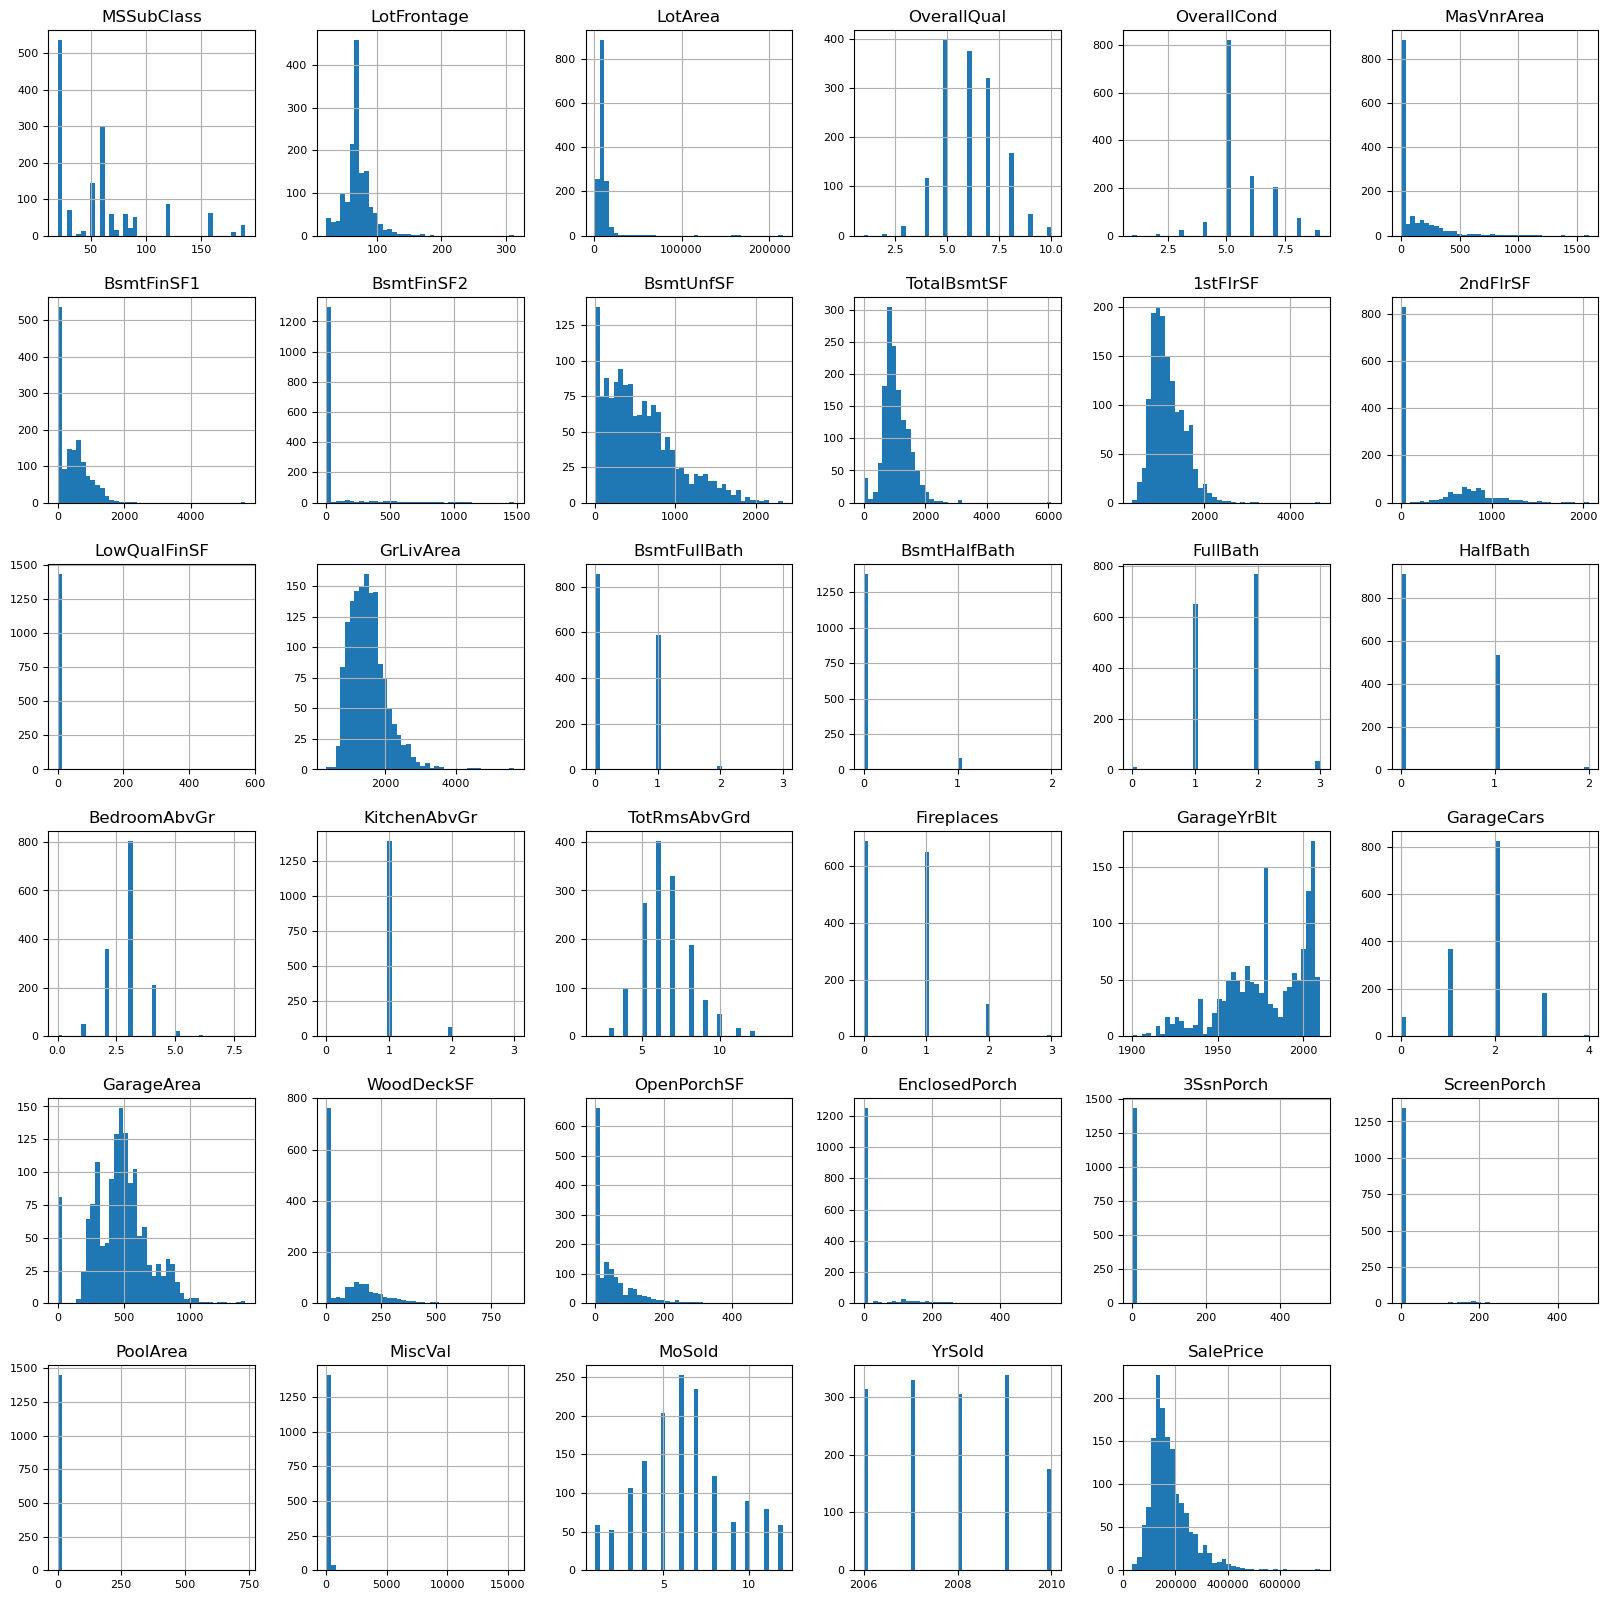

In [25]:
# Creating histogram of all numeric columns
df_clean.hist(figsize=(20, 20), bins=40, xlabelsize=8, ylabelsize=8); 


Note: from histogram above, we can see that Features like 1stFlrSF, TotalBsmtSF etc. seem to share a distribution similar to SalePrice.
Also, columns like 'FullBath', 'HalfBath' etc. are categorical columns having numeric values. Need to change the datatypes of  these categorical columns

In [26]:
# categorical columns having numeric datatypes
cat_num = df_clean[[
'OverallCond',
'OverallQual',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath', 
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr', 
'TotRmsAbvGrd', 
'Fireplaces',
'GarageCars',
'MoSold', 
 'YrSold']]


for i in cat_num:
    print(df_clean[i])
    print(df_clean[i].unique())
    

0       5
1       8
2       5
3       5
4       5
       ..
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: int64
[5 8 6 7 4 2 3 9 1]
0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64
[ 7  6  8  5  9  4 10  3  1  2]
0       1
1       0
2       1
3       1
4       1
       ..
1455    0
1456    1
1457    0
1458    1
1459    1
Name: BsmtFullBath, Length: 1460, dtype: int64
[1 0 2 3]
0       0
1       1
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: BsmtHalfBath, Length: 1460, dtype: int64
[0 1 2]
0       2
1       2
2       2
3       1
4       2
       ..
1455    2
1456    2
1457    2
1458    1
1459    1
Name: FullBath, Length: 1460, dtype: int64
[2 1 3 0]
0       1
1       0
2       1
3       0
4       1
       ..
1455    1
1456    0
1457    0
1458    0
1459    1
Name: HalfBath, Length: 1460, d

In [27]:
## changing the datatypes of categorical columns mentioned above

df_clean['OverallCond']=df_clean['OverallCond'].astype('object')
df_clean['OverallQual']=df_clean['OverallQual'].astype('object')
df_clean['BsmtFullBath']=df_clean['BsmtFullBath'].astype('object')
df_clean['BsmtHalfBath']=df_clean['BsmtHalfBath'].astype('object')
df_clean['FullBath']=df_clean['FullBath'].astype('object')
df_clean['HalfBath']=df_clean['HalfBath'].astype('object')
df_clean['BedroomAbvGr']=df_clean['BedroomAbvGr'].astype('object')
df_clean['KitchenAbvGr']=df_clean['KitchenAbvGr'].astype('object')
df_clean['TotRmsAbvGrd']=df_clean['TotRmsAbvGrd'].astype('object')
df_clean['Fireplaces']=df_clean['Fireplaces'].astype('object')
df_clean['GarageCars']=df_clean['GarageCars'].astype('object')
df_clean['MoSold']=df_clean['MoSold'].astype('object')
df_clean['YrSold']=df_clean['YrSold'].astype('object')

In [28]:
df_num = df_clean.select_dtypes(include=['int','float'])

making a pairplot of all the numeric variables with respect to the target variable 

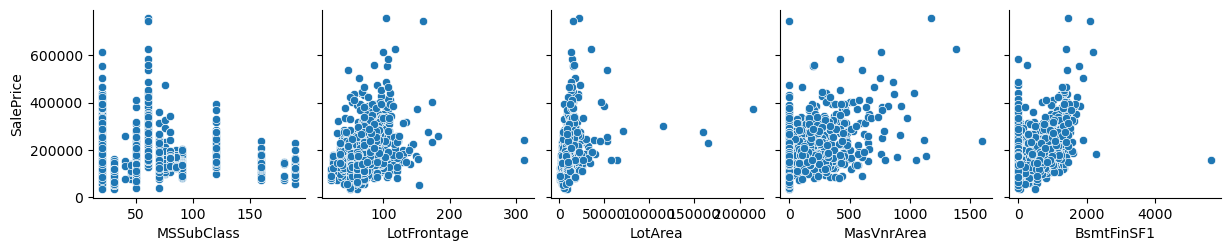

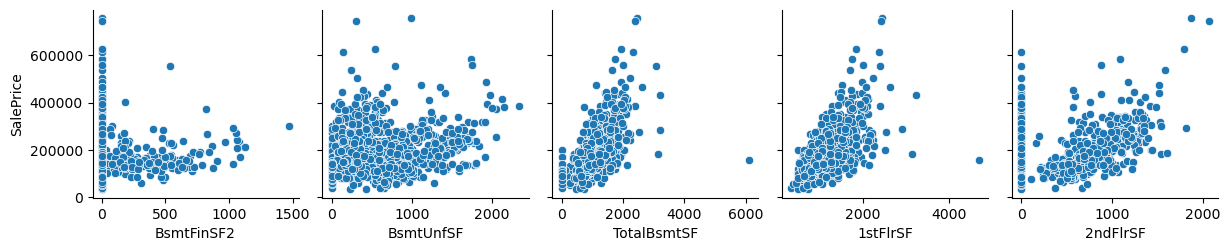

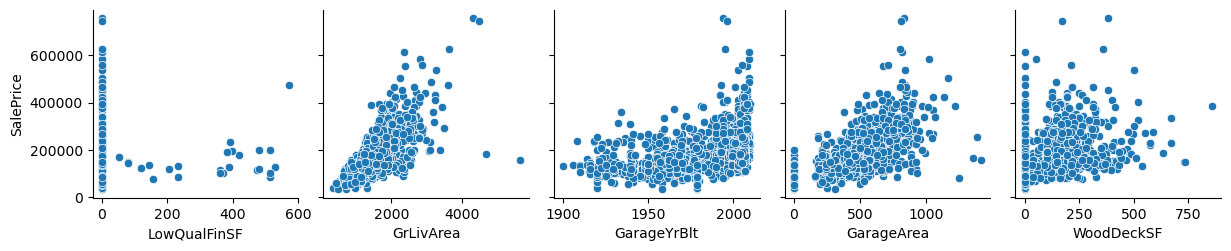

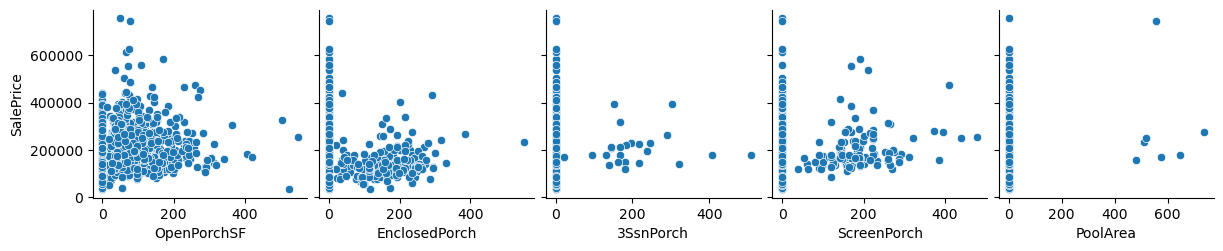

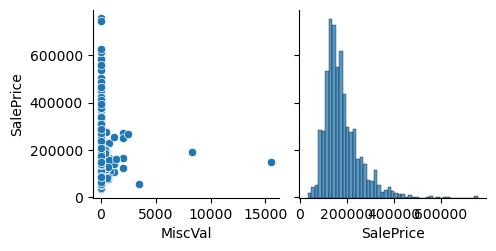

In [29]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

In [30]:
#  checking correlation of numeric variable with SalePrice

df_num_corr = df_num.corr()['SalePrice']
print(df_num_corr)

## features having high correlation with target variable (>0.5)
print("\nfeatures havinghigh correlation with target variable\n", df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False))

MSSubClass      -0.084284
LotFrontage      0.334901
LotArea          0.263843
MasVnrArea       0.475241
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
GarageYrBlt      0.470177
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
SalePrice        1.000000
Name: SalePrice, dtype: float64

features havinghigh correlation with target variable
 SalePrice      1.000000
GrLivArea      0.708624
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
Name: SalePrice, dtype: float64


In [31]:
# correlation matrix
cor = df_num.corr()
cor

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,...,0.080187,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,...,0.064324,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.334901
LotArea,-0.139781,0.306795,1.000000,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,...,-0.024812,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,0.022895,0.179283,0.103960,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,...,0.249367,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,0.475241
BsmtFinSF1,-0.069836,0.215828,0.214103,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,...,0.150338,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.072302,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,...,-0.087126,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,-0.140759,0.122156,-0.002618,0.114184,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,...,0.186098,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,-0.238518,0.363358,0.260833,0.362452,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,...,0.311700,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,-0.251758,0.414266,0.299475,0.342160,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,...,0.227127,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.307886,0.072483,0.050986,0.174019,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,...,0.069315,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334


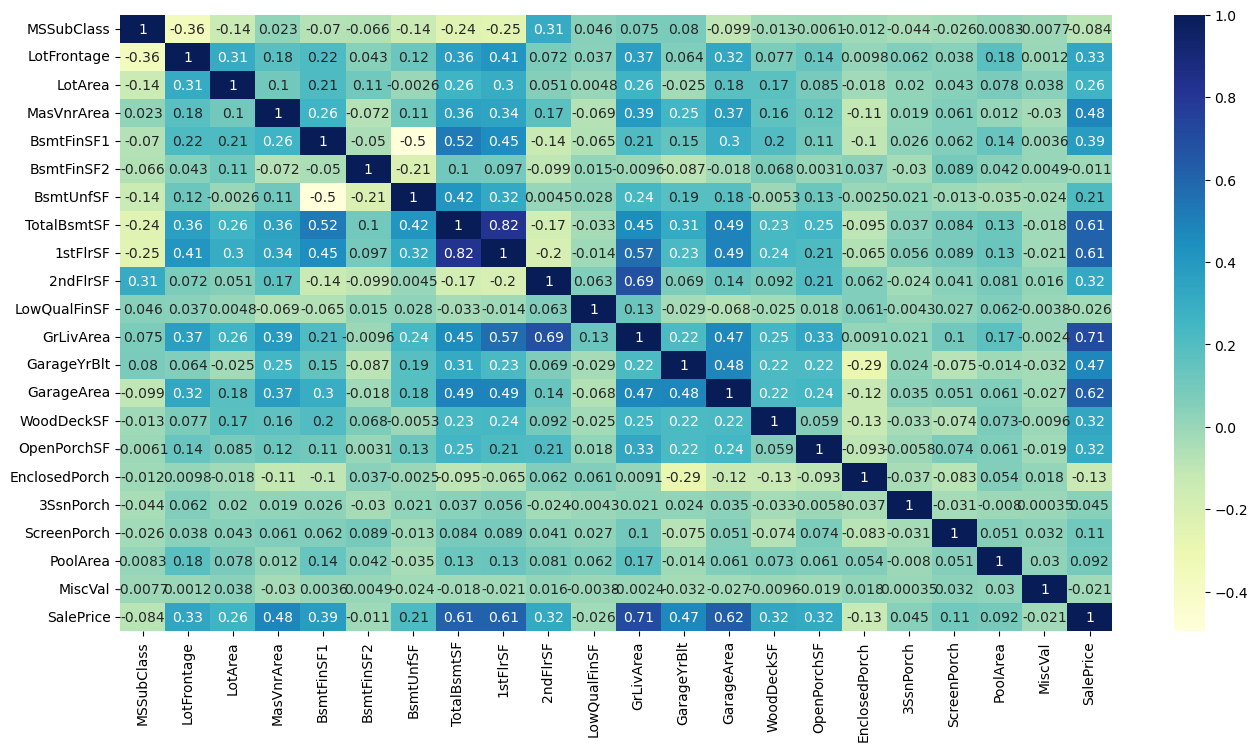

In [32]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


Note:
features havinghigh correlation with target variable (>0.5)
- GrLivArea       0.711706
- GarageArea      0.607535
- 1stFlrSF        0.604714
- TotalBsmtSF     0.602042
- YearBuilt       0.504297
- YearRemodAdd    0.501435

Note:
Correlation among independent variables:
- for example GarageArea and GrLivArea are positively correlated 


#### Visualising Categorical Variables

for the categorical variables, making  barplots and boxplots with respect to the target variable 

In [33]:
df_cat = df_clean.select_dtypes(include=['object'])

In [34]:
df_cat.head()  ## there are 51 categorical columns

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,2,2008,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,2,TA,TA,Y,5,2007,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,9,2008,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,3,TA,TA,Y,2,2006,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,3,TA,TA,Y,12,2008,WD,Normal


In [35]:
# checking the unique values for the categorical columns
for i in df_cat:
    print(df_clean[i].unique())


['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
[7 6 8 5 9 4 10 3 1 2]
[5 8 6 7 4 2 3 9 1]
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['Viny

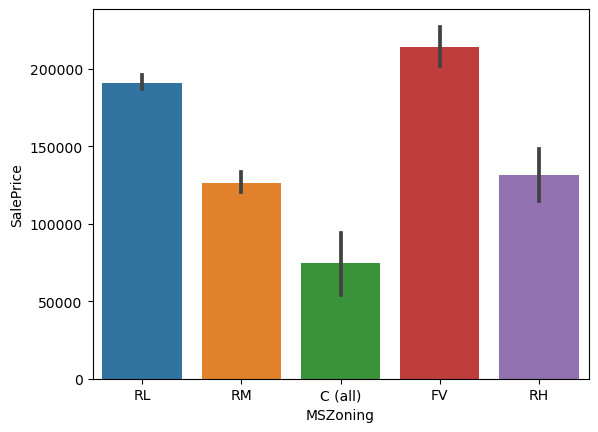

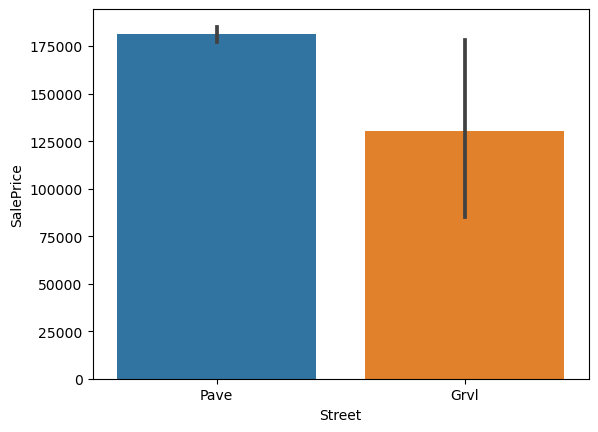

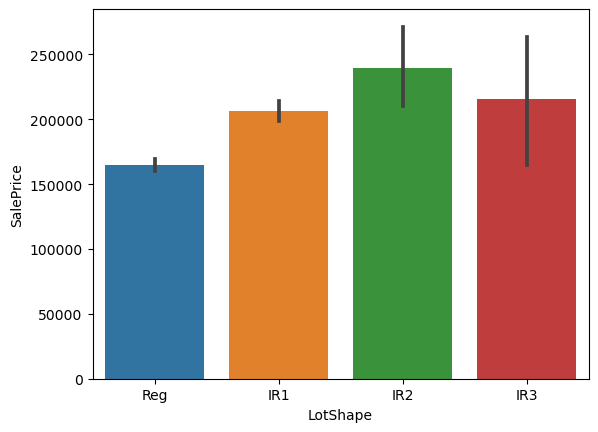

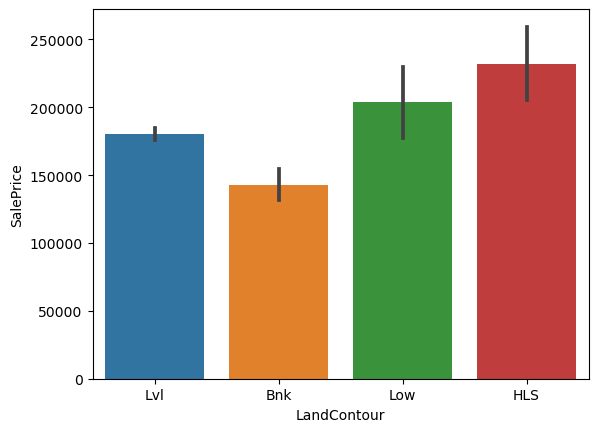

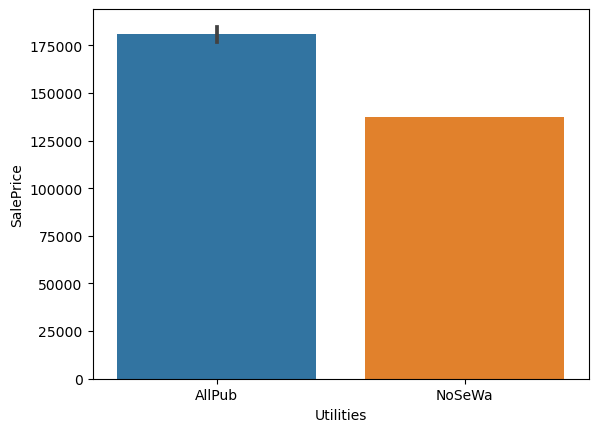

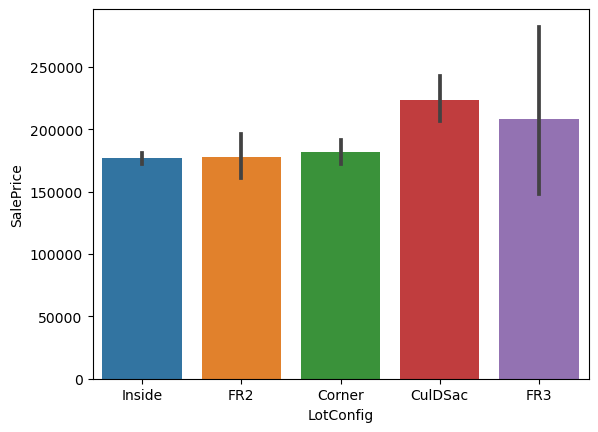

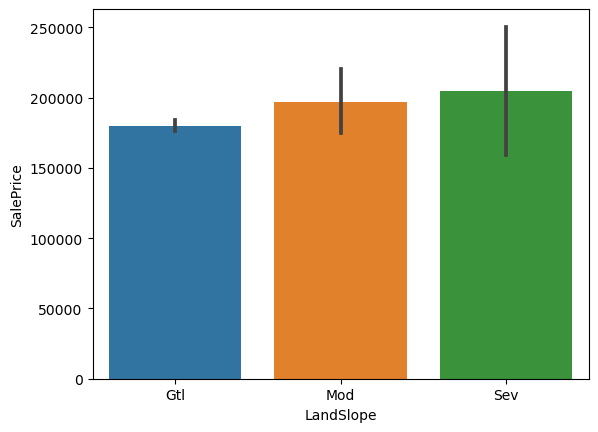

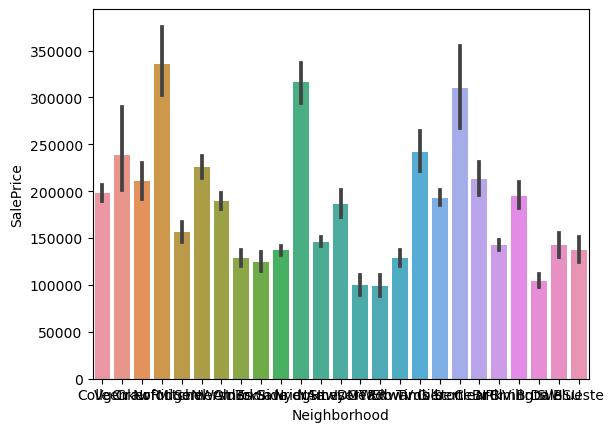

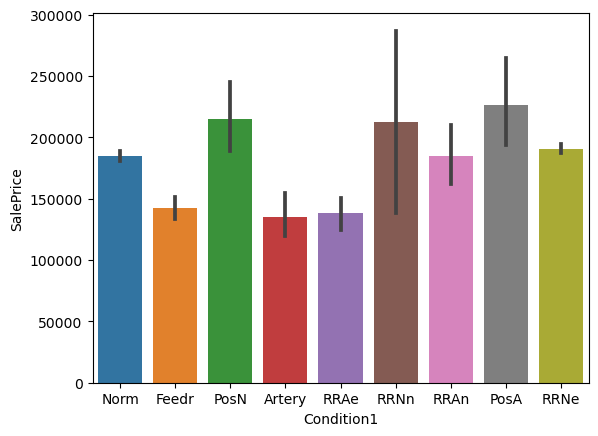

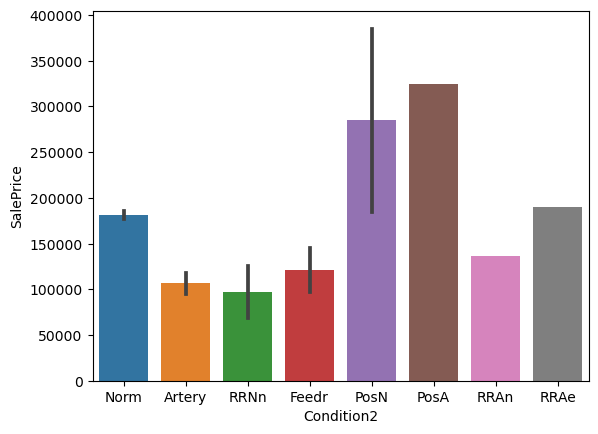

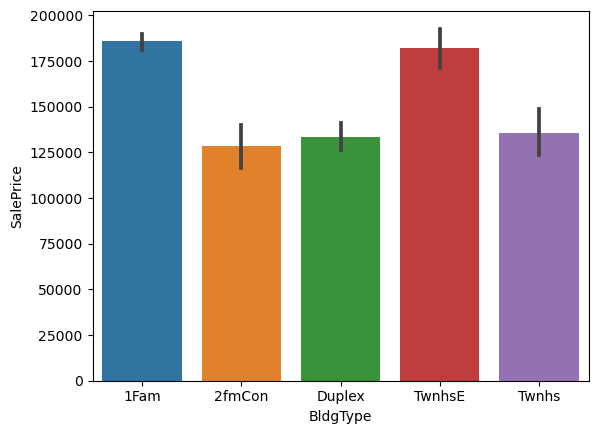

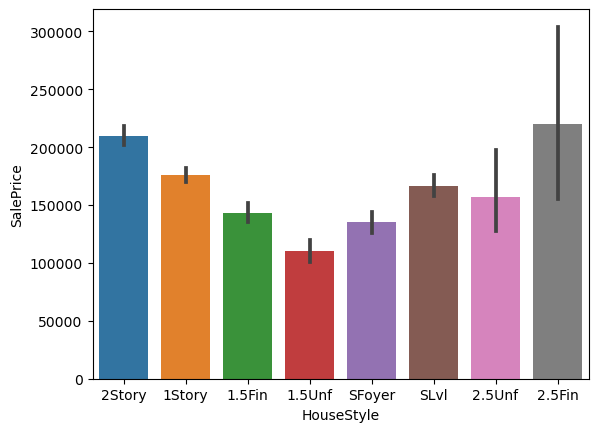

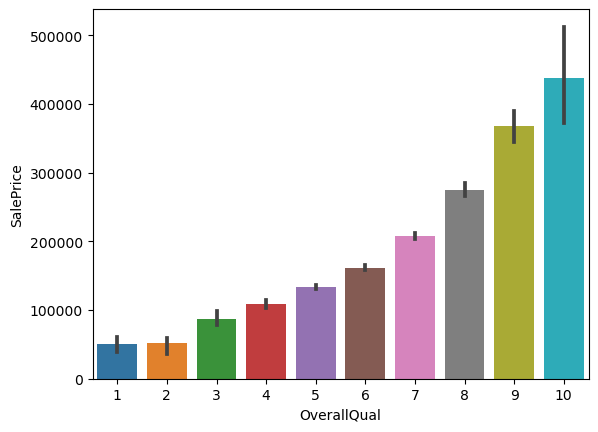

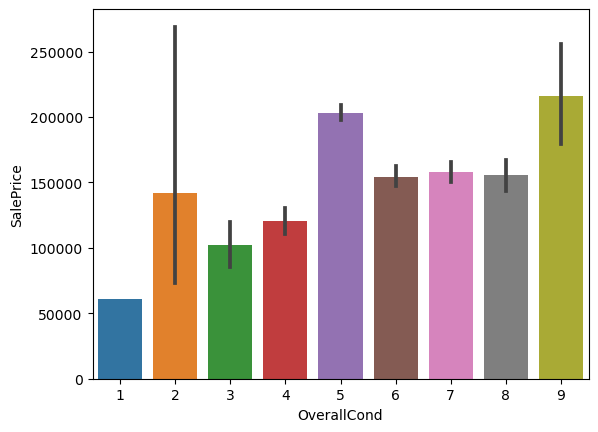

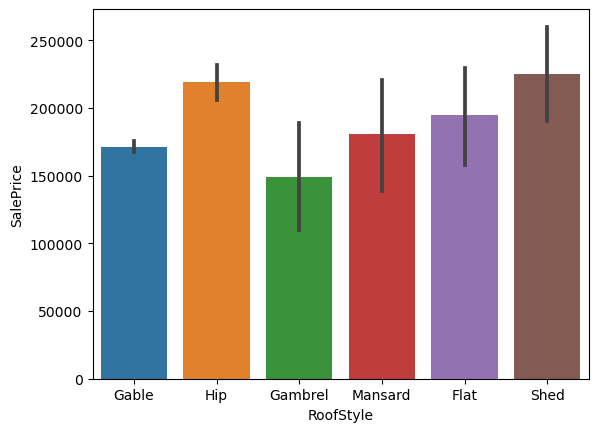

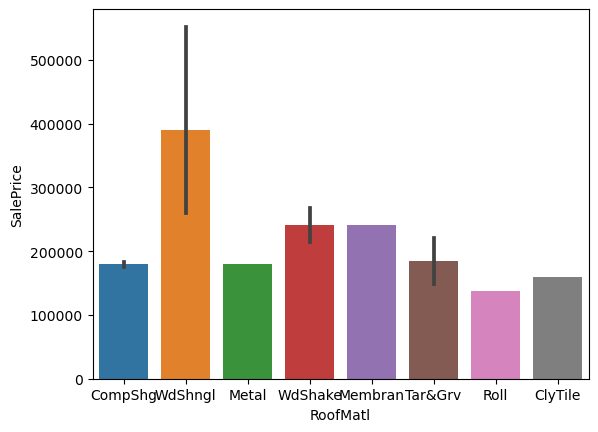

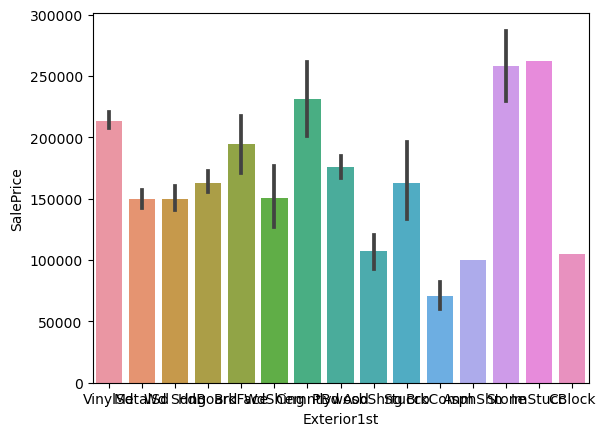

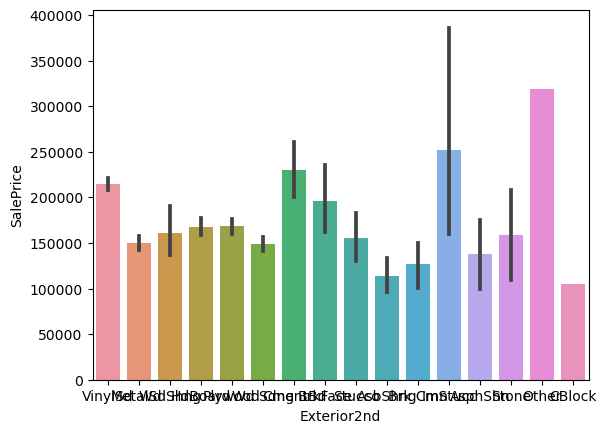

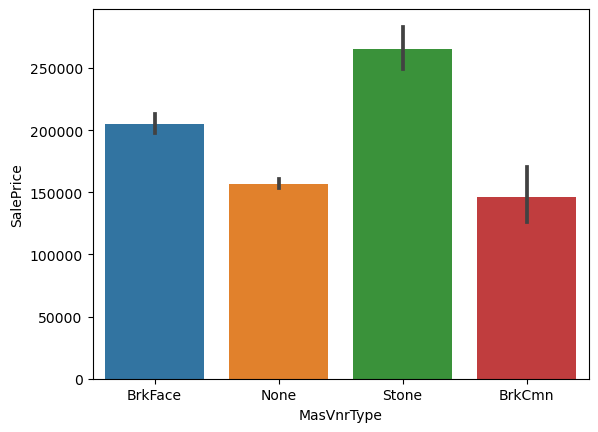

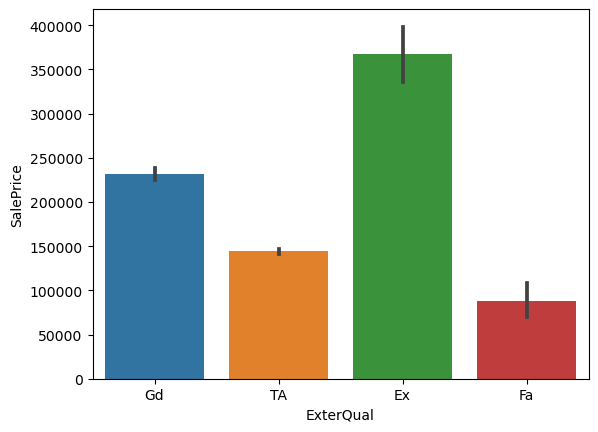

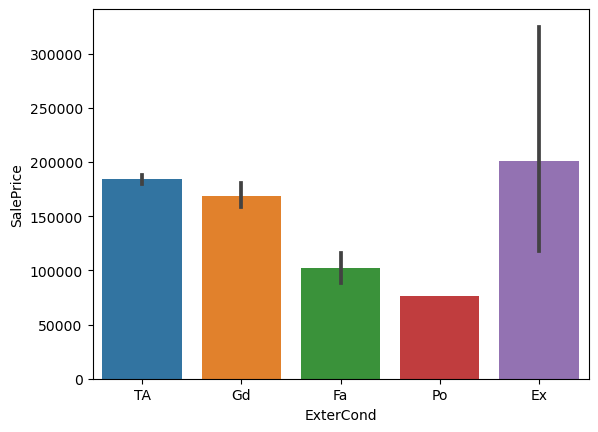

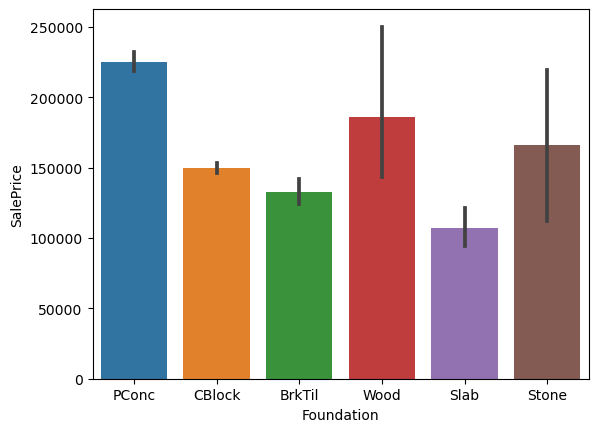

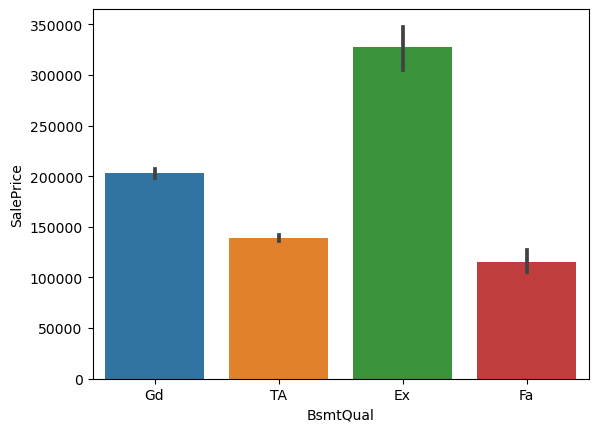

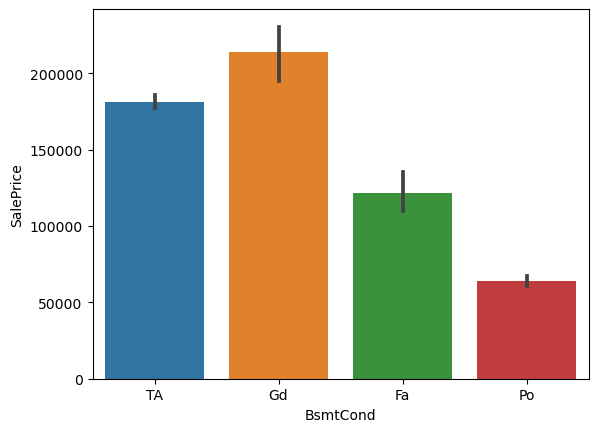

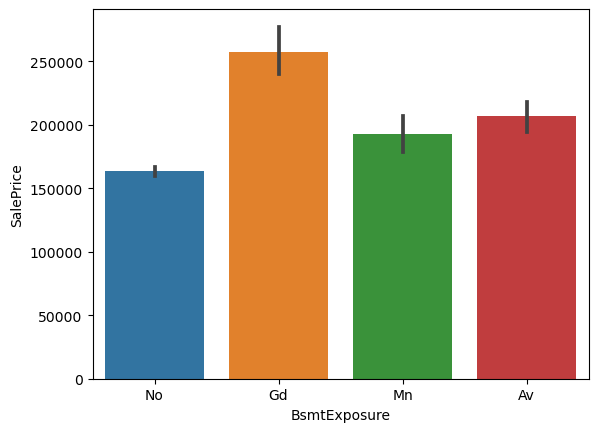

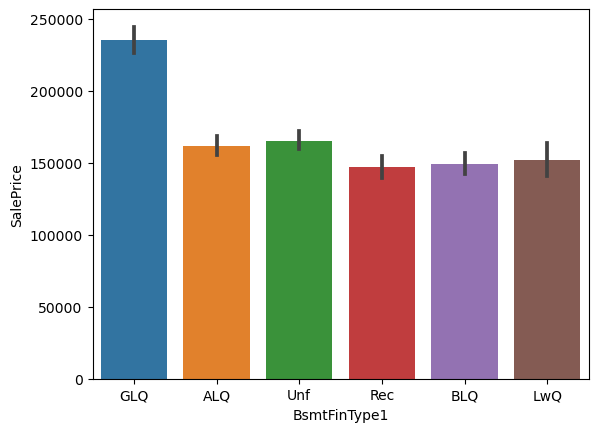

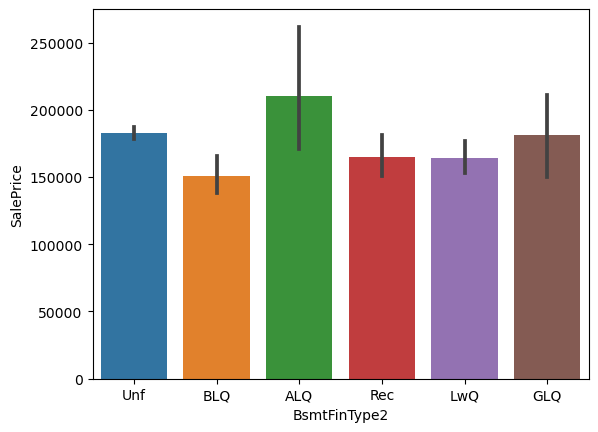

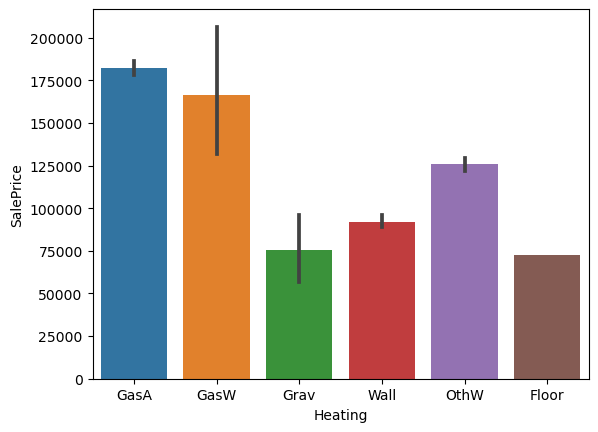

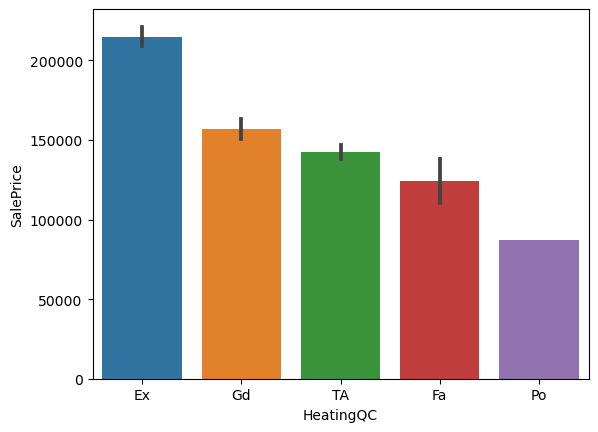

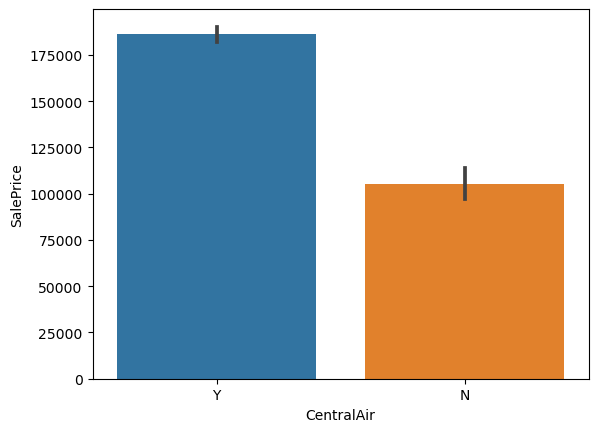

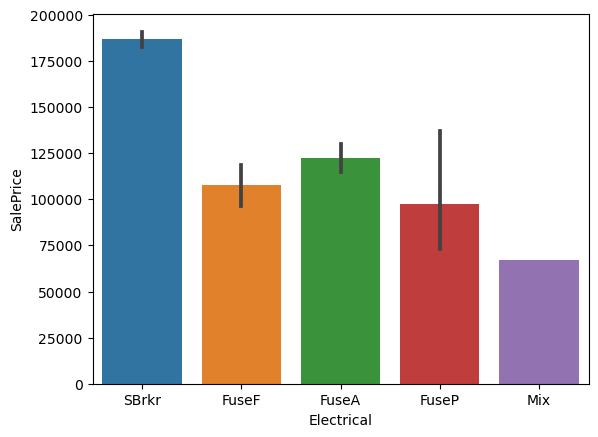

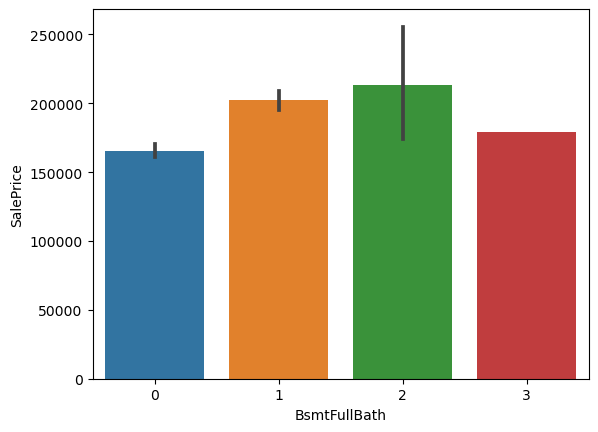

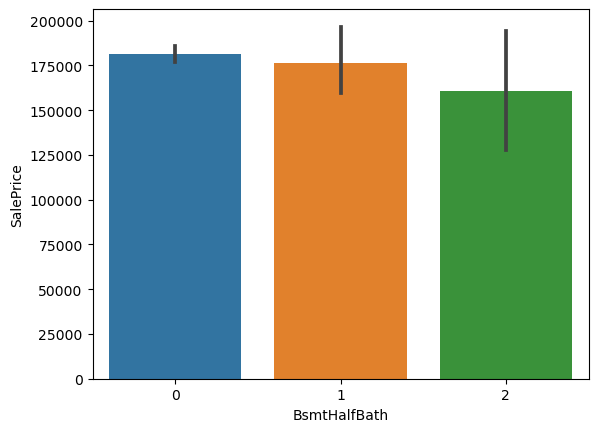

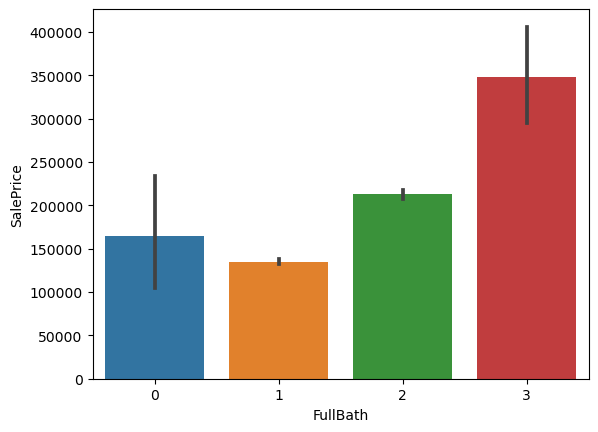

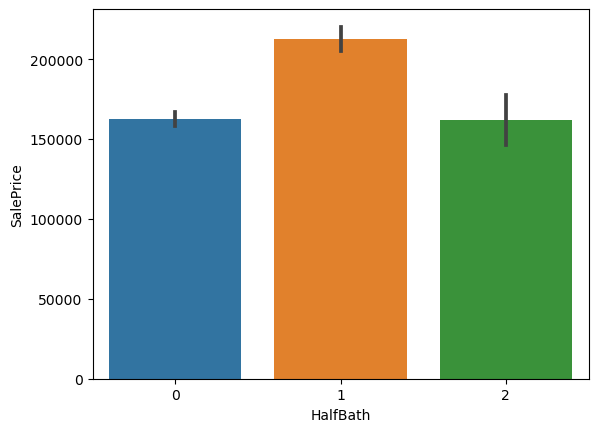

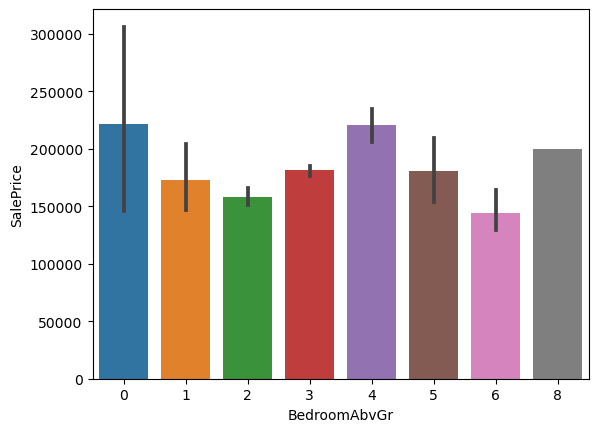

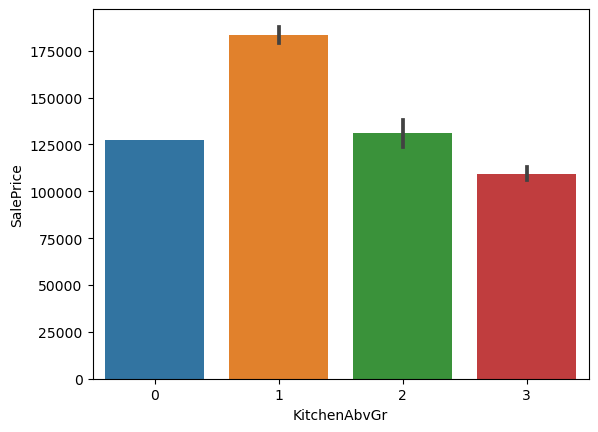

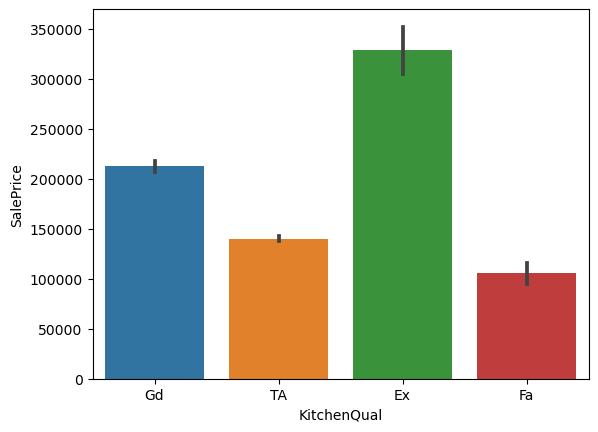

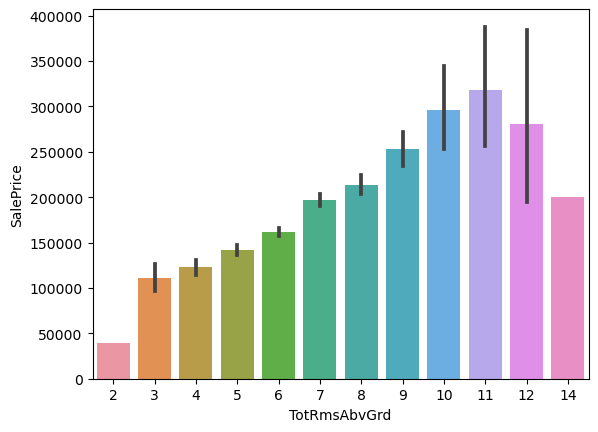

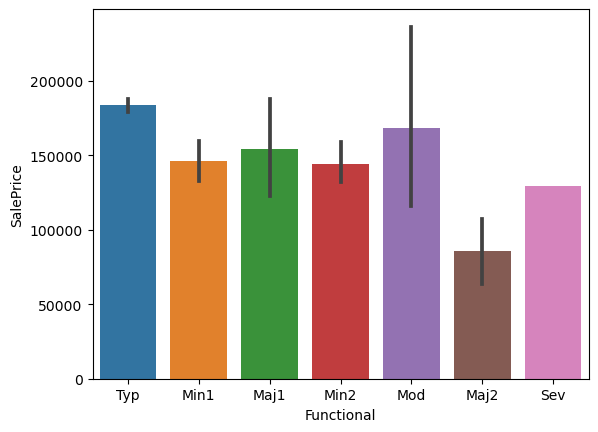

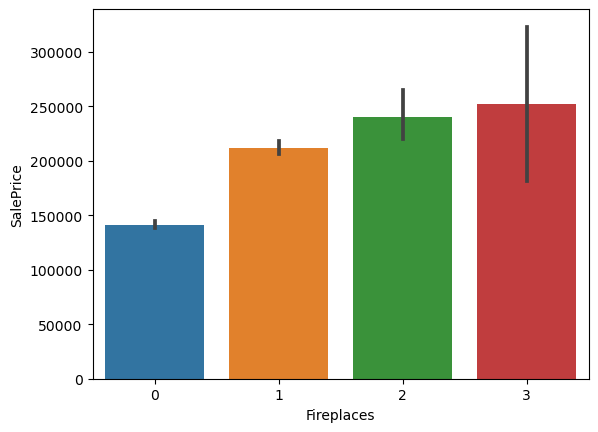

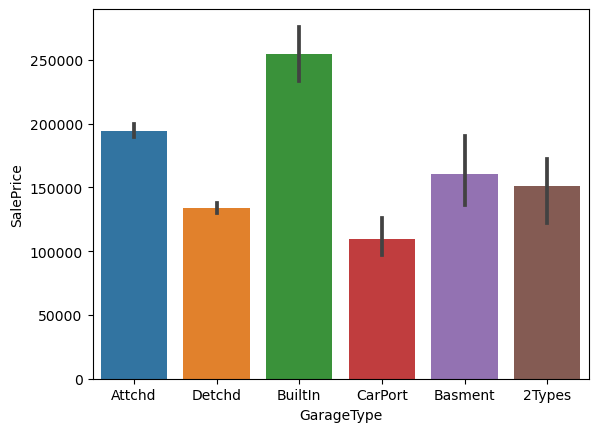

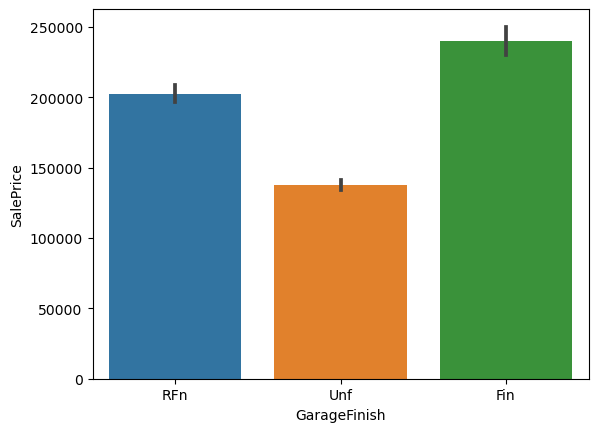

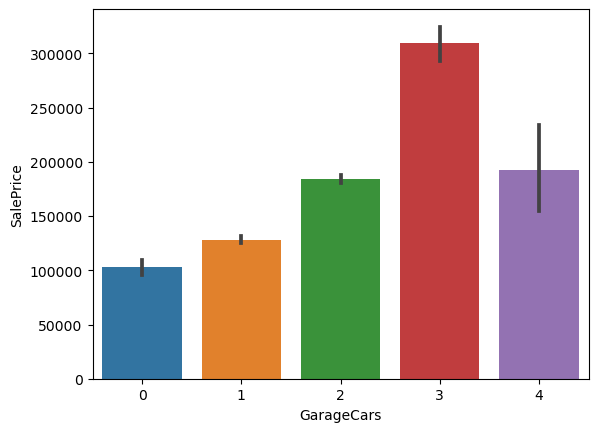

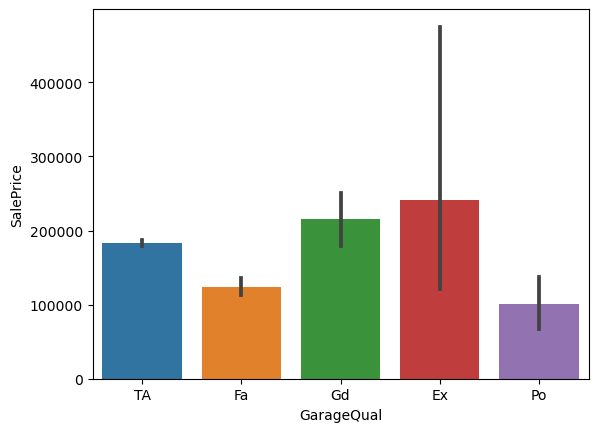

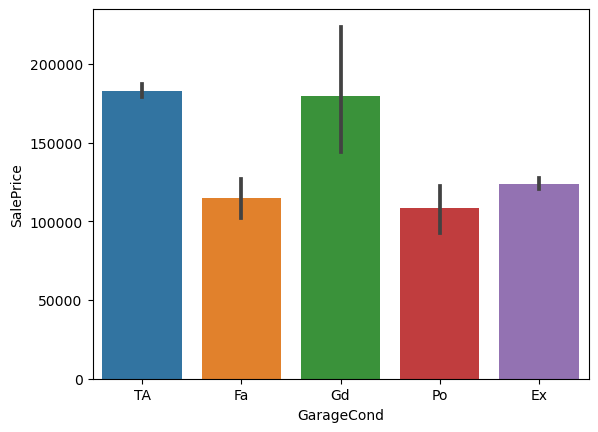

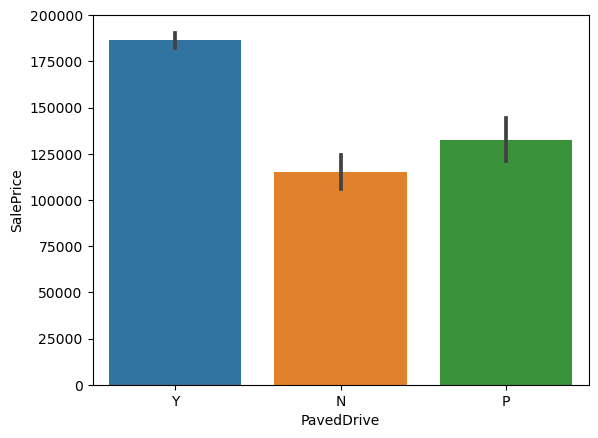

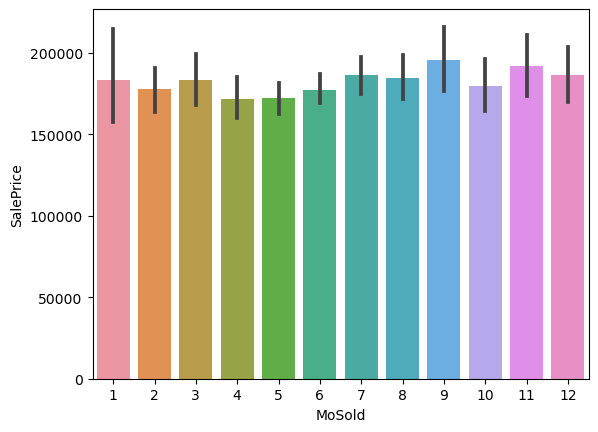

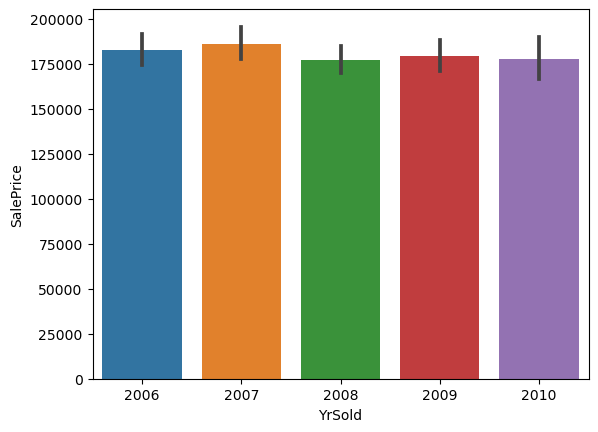

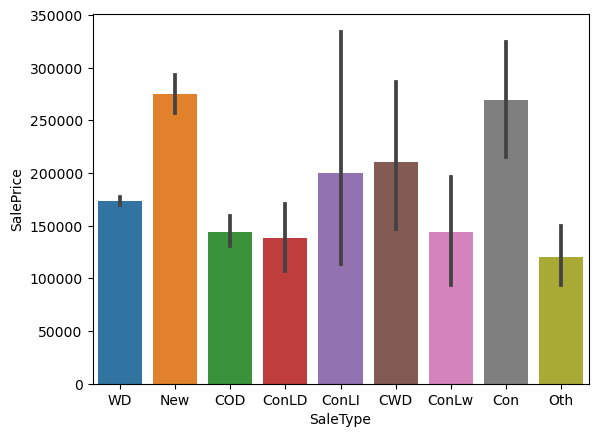

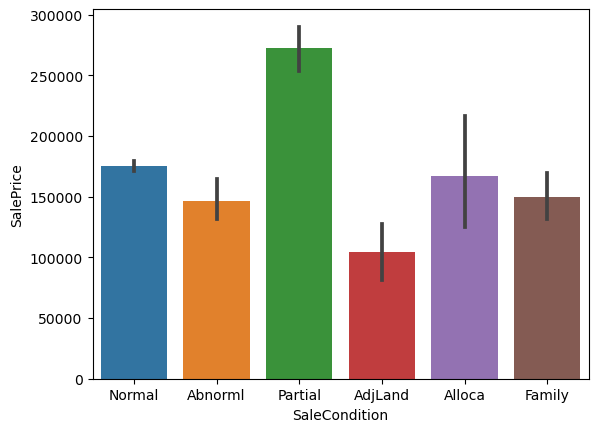

In [36]:
## creating barplots
for i in df_cat:
    sns.barplot(x = df_clean[i], y = df_clean['SalePrice'], data = df_clean)
    plt.show()


Note:
With categorical variables like BsmtFullBath,fireplaces,OverallQual etc. there seems like a increase in average sales with increase in values

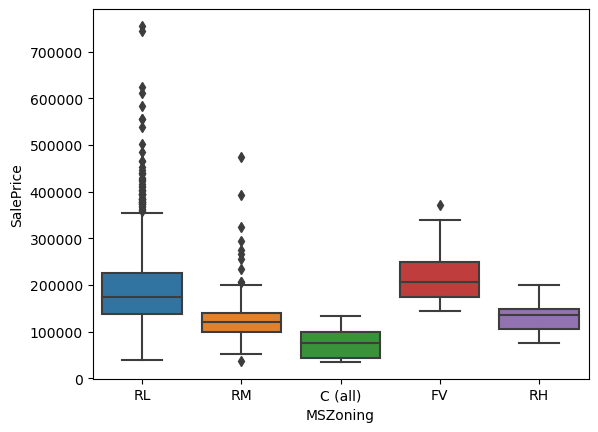

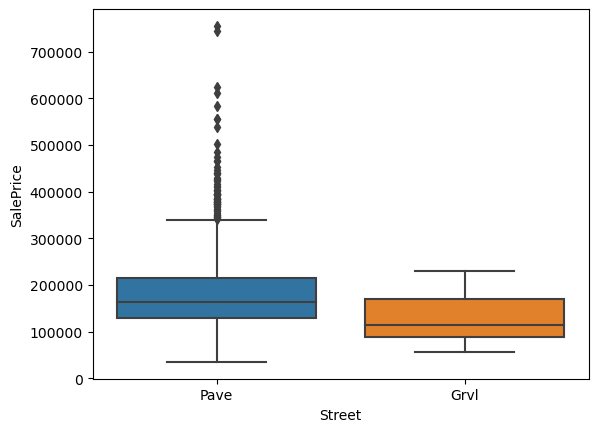

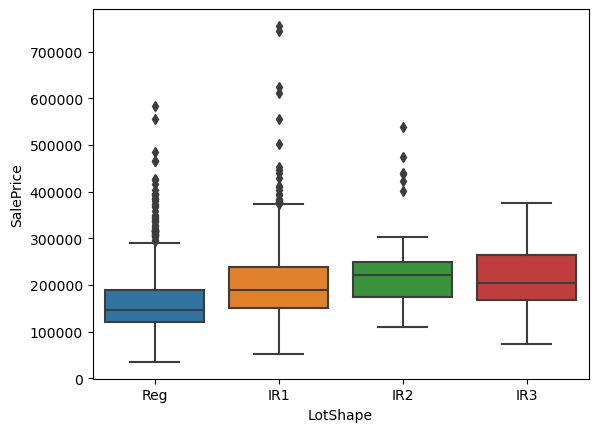

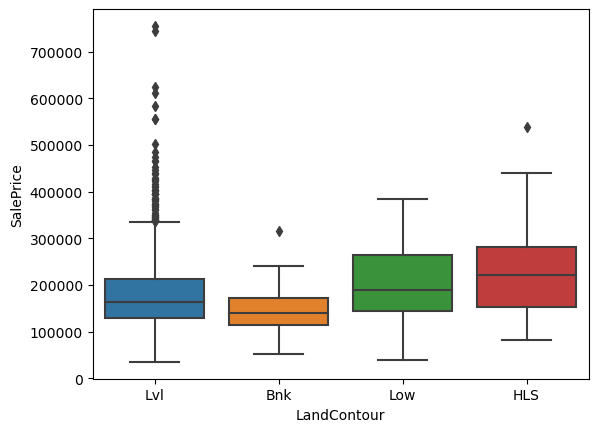

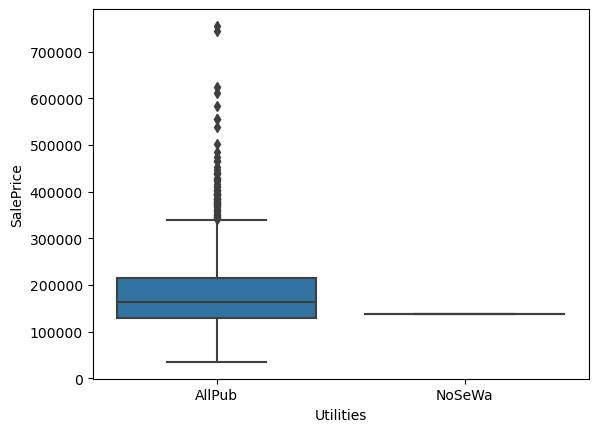

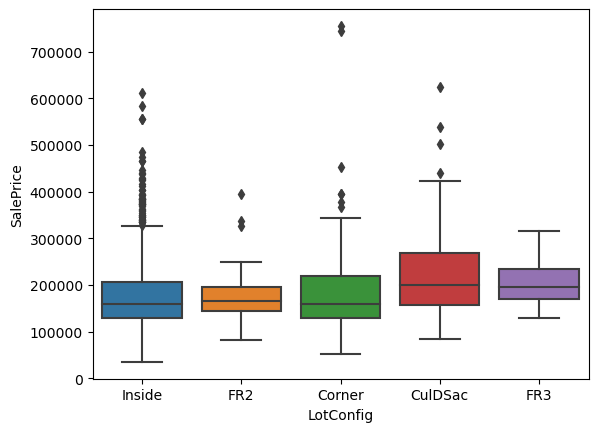

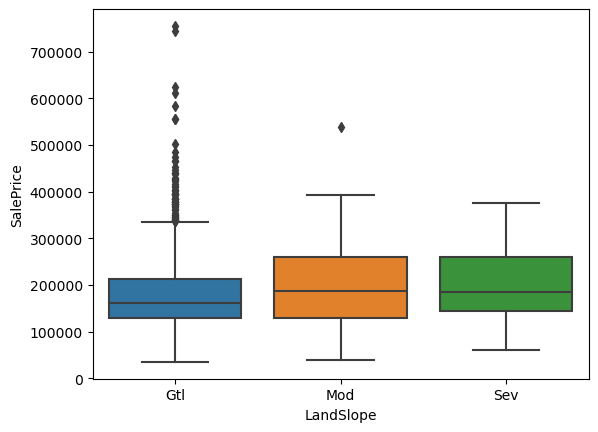

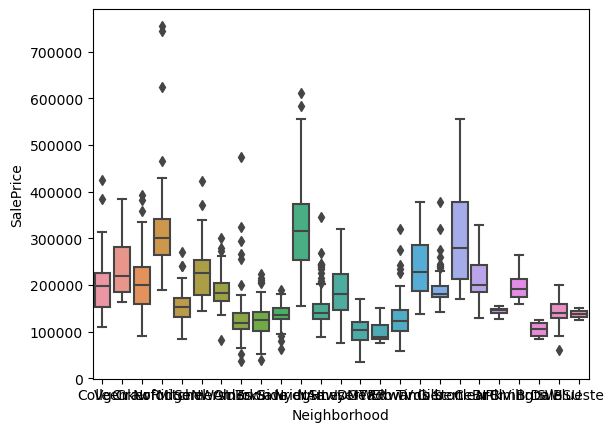

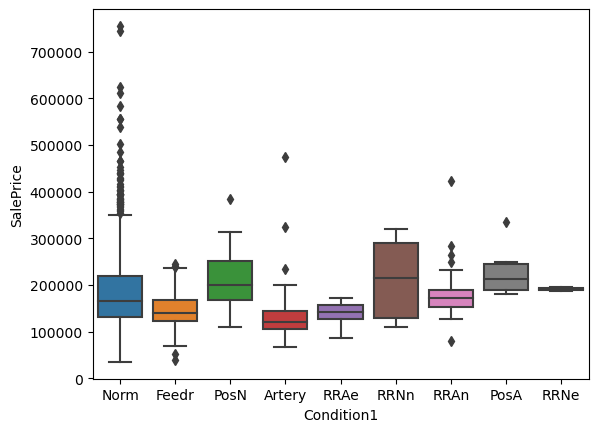

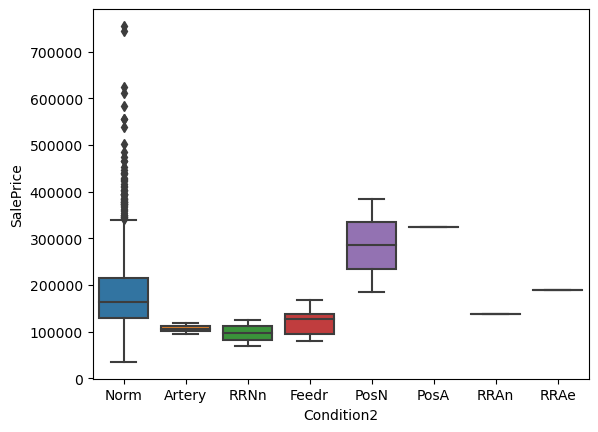

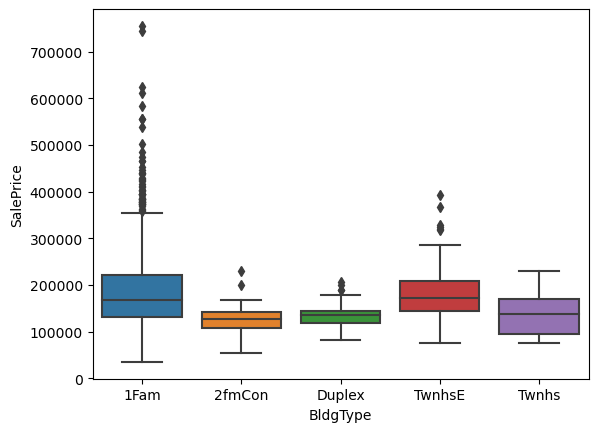

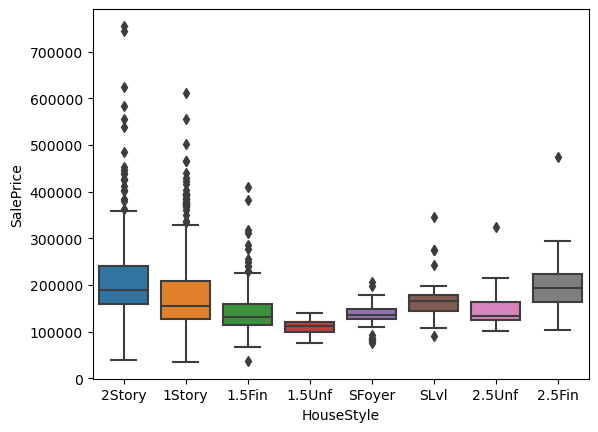

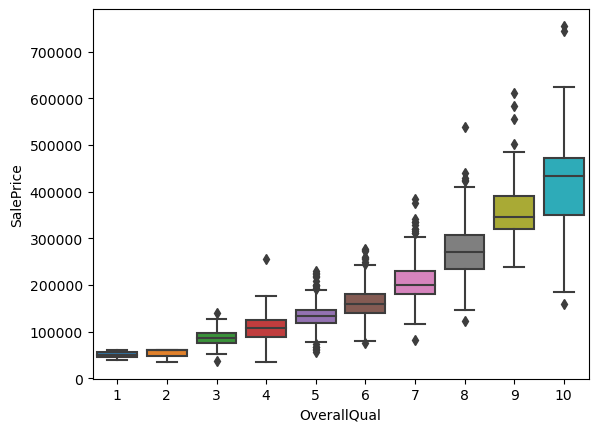

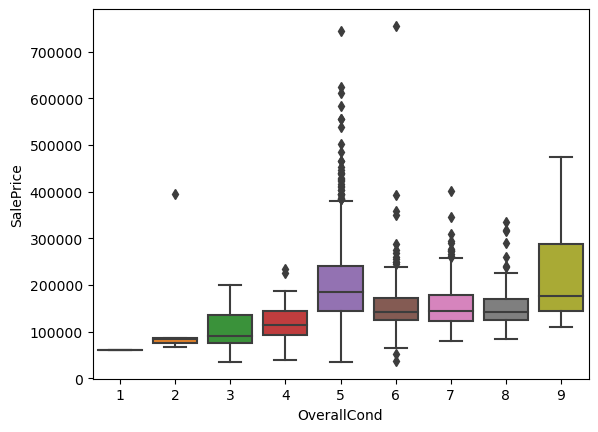

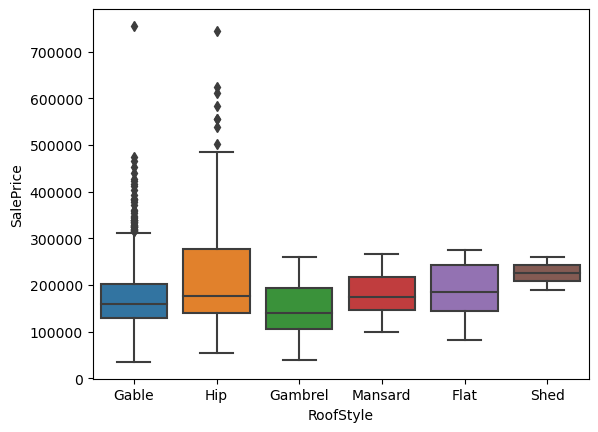

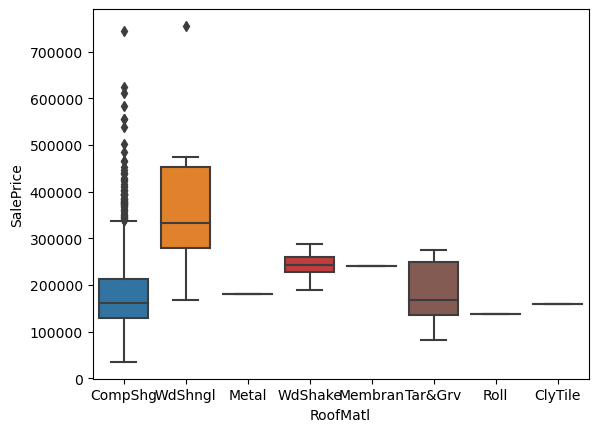

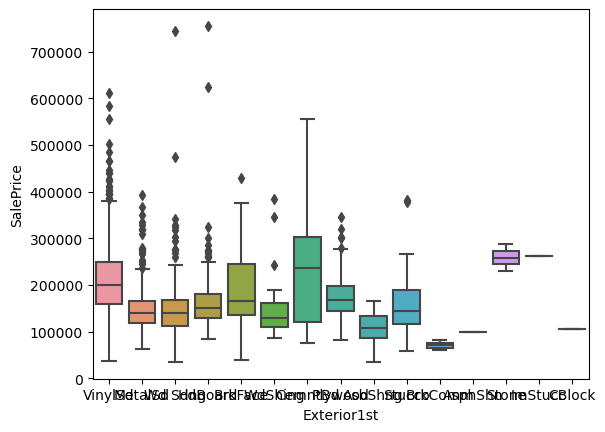

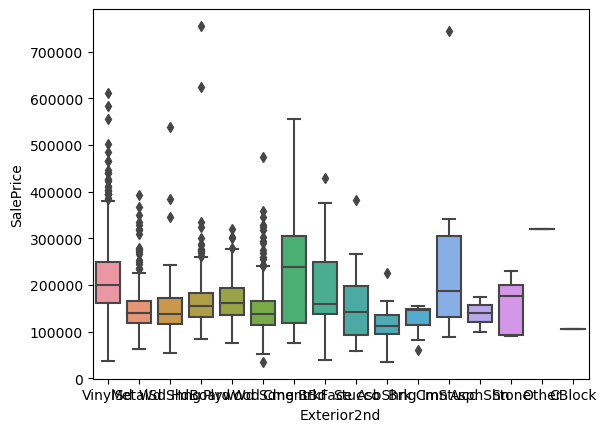

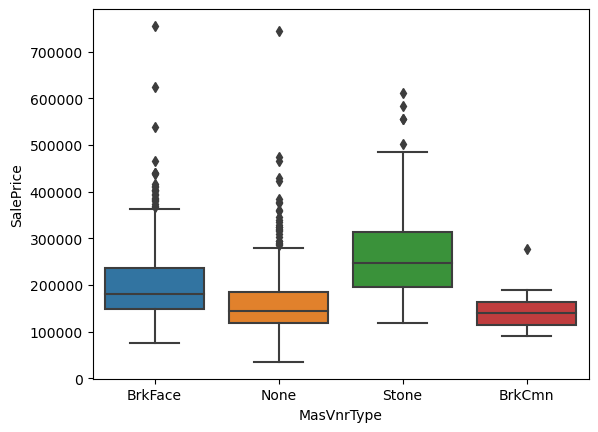

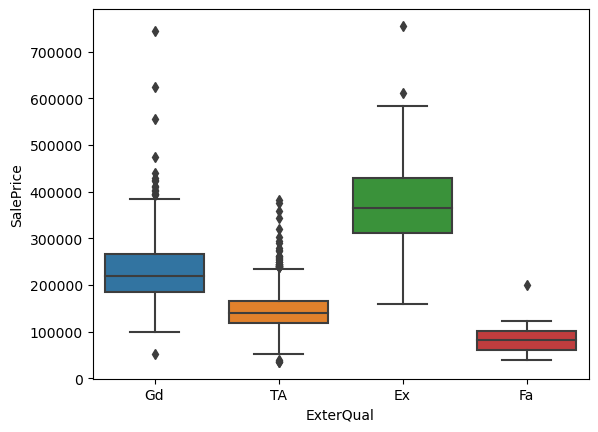

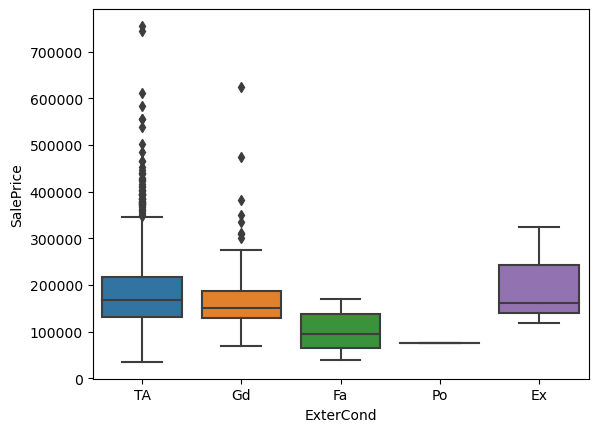

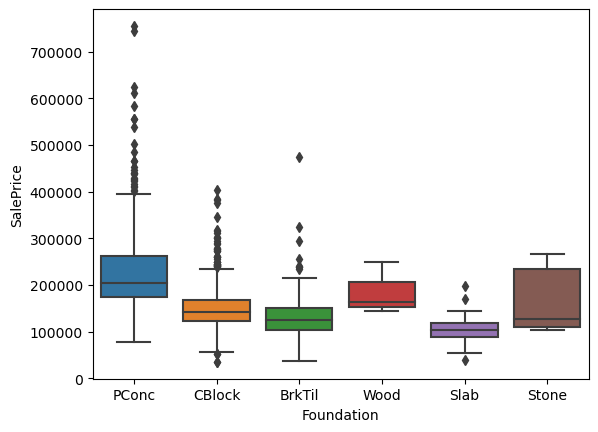

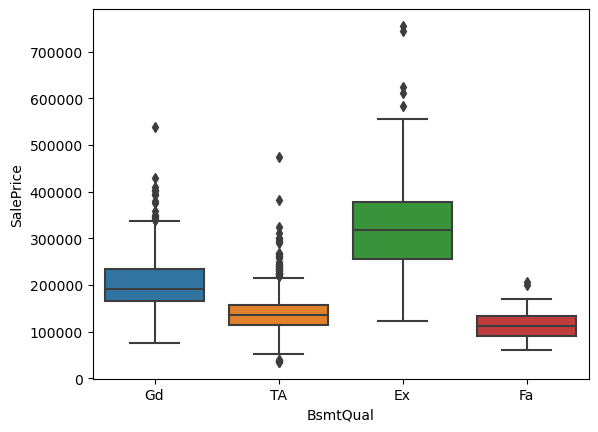

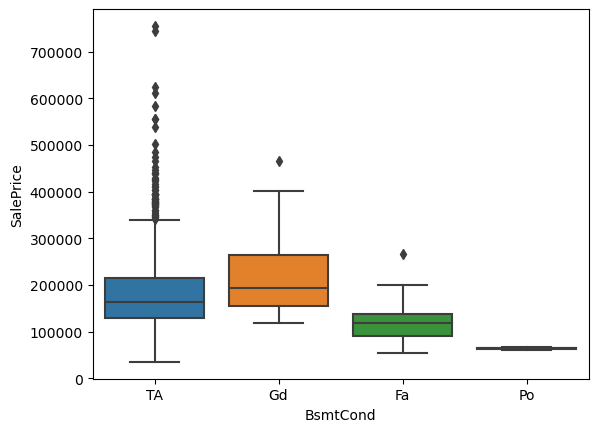

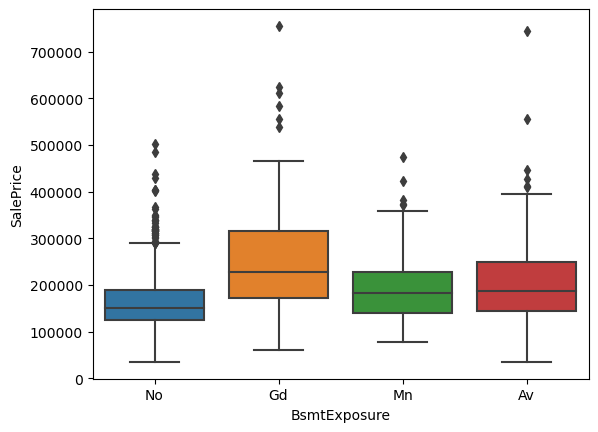

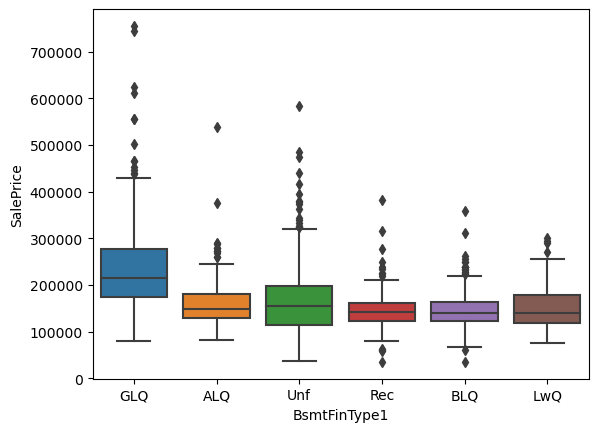

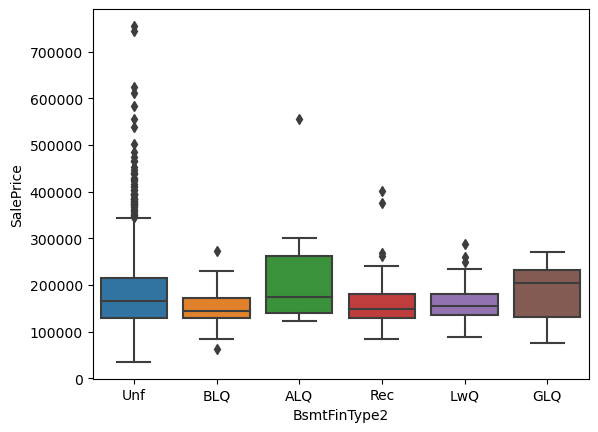

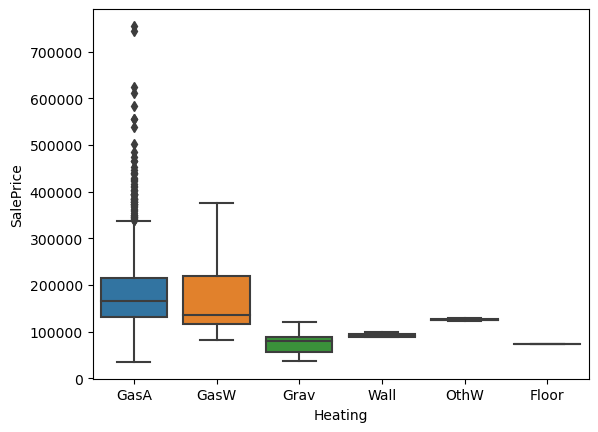

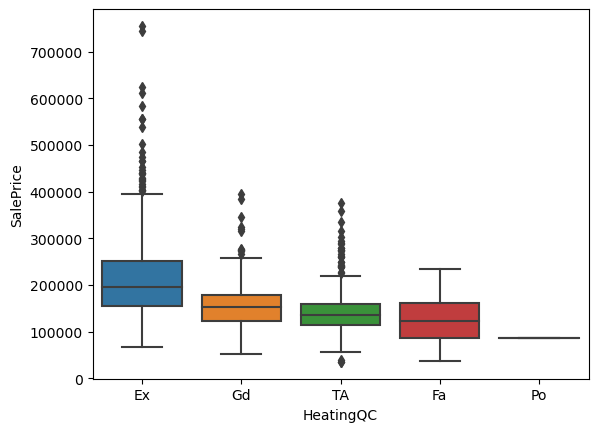

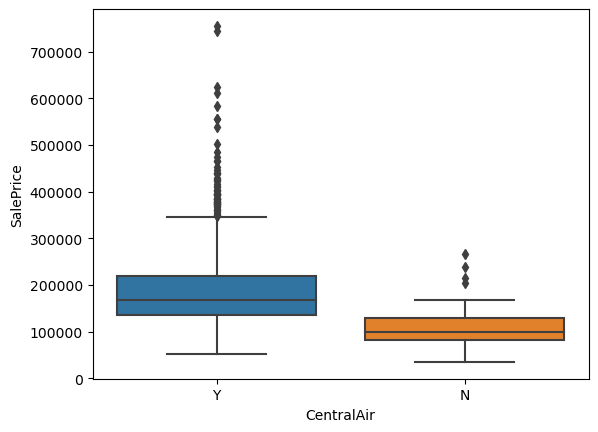

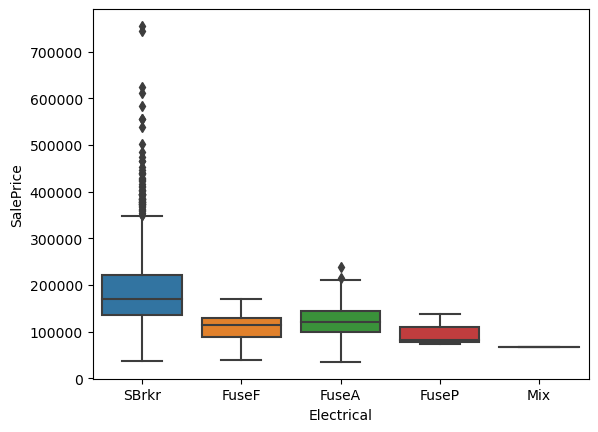

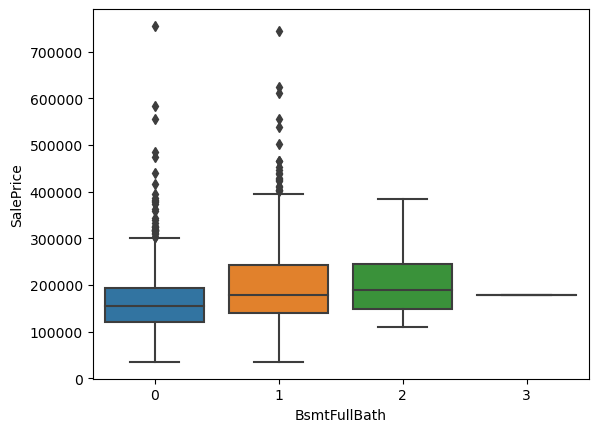

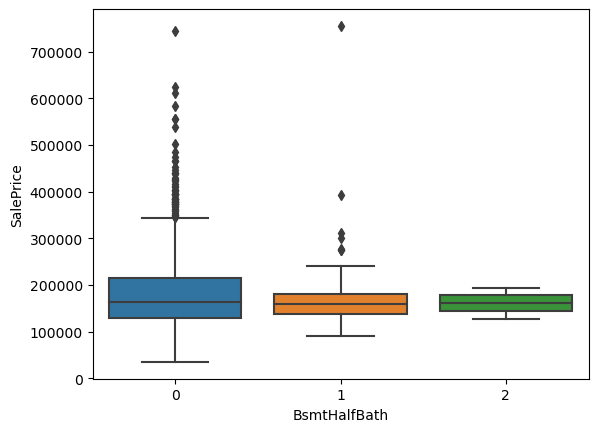

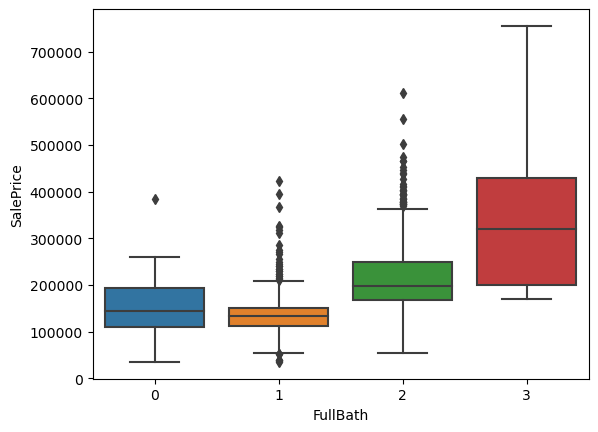

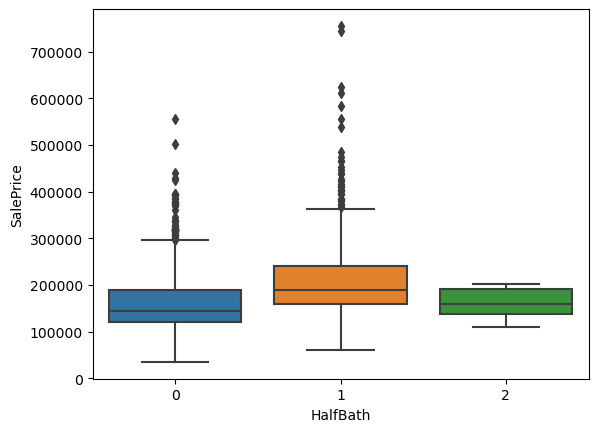

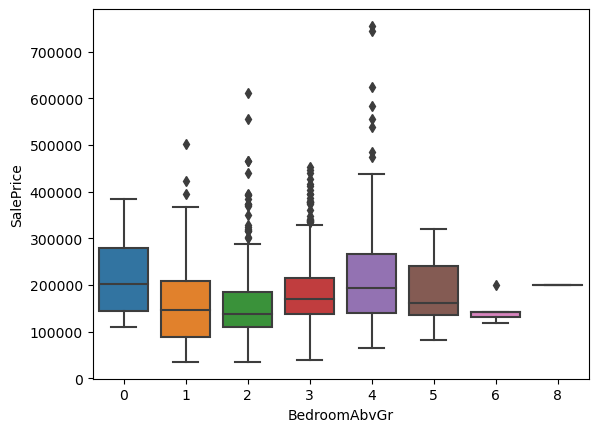

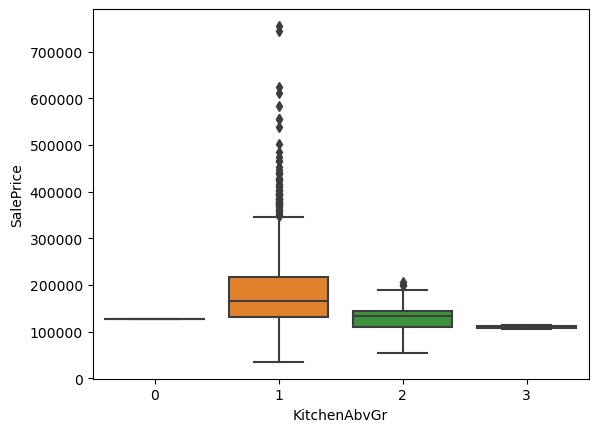

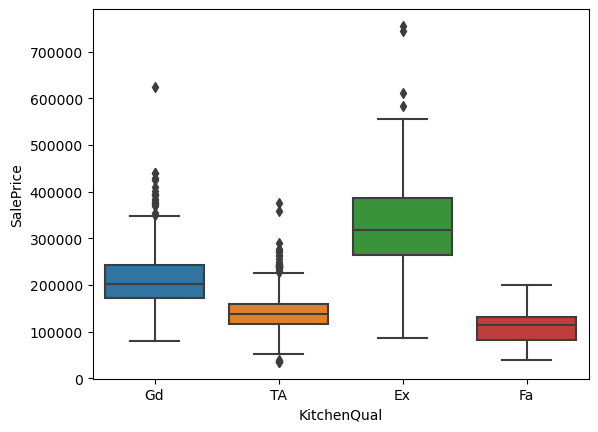

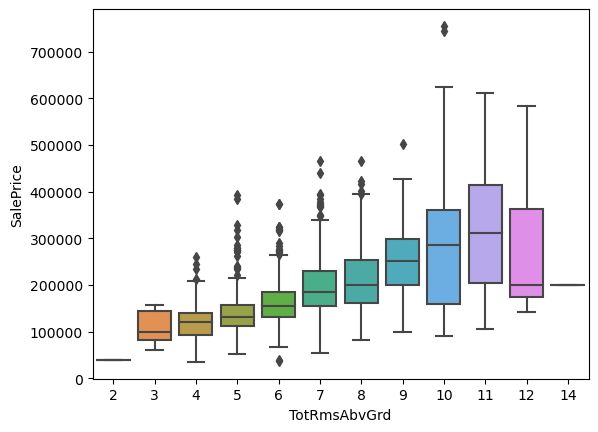

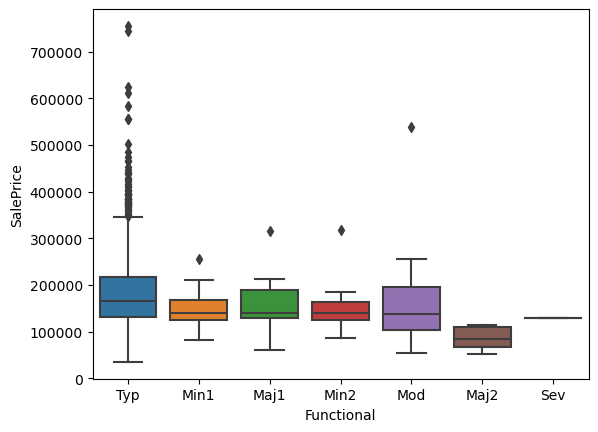

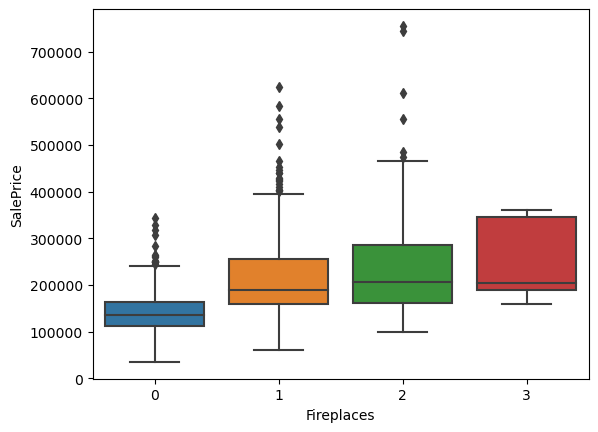

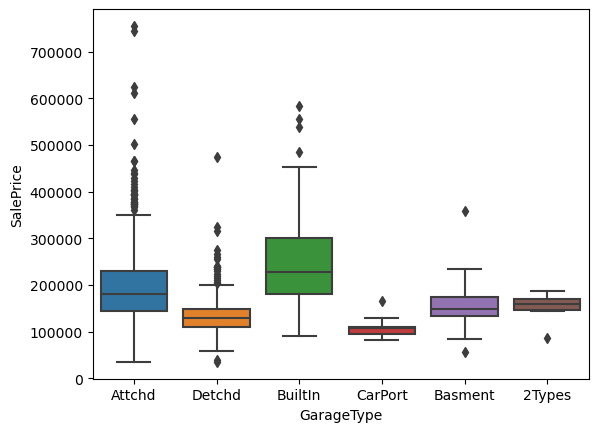

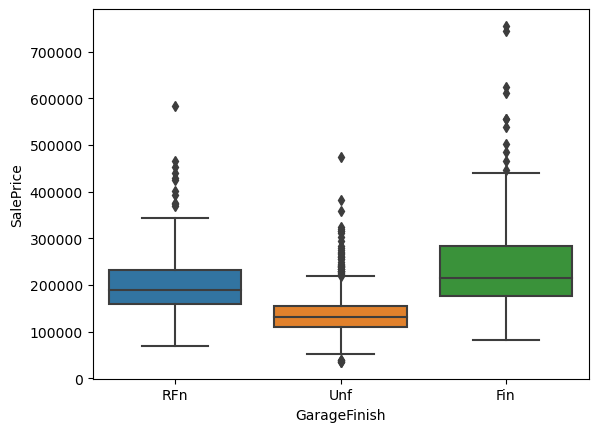

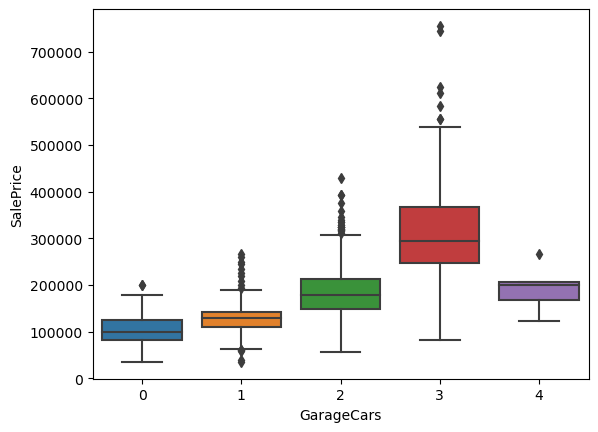

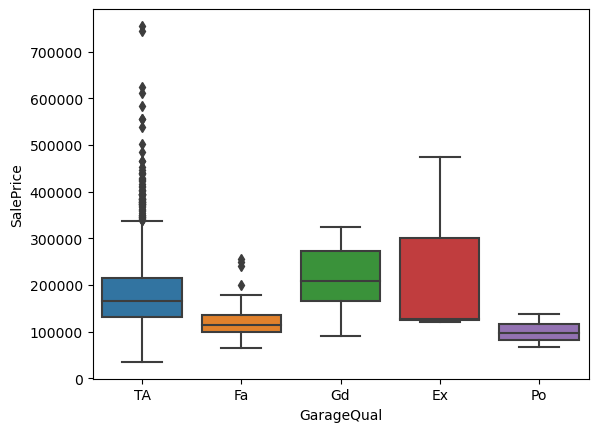

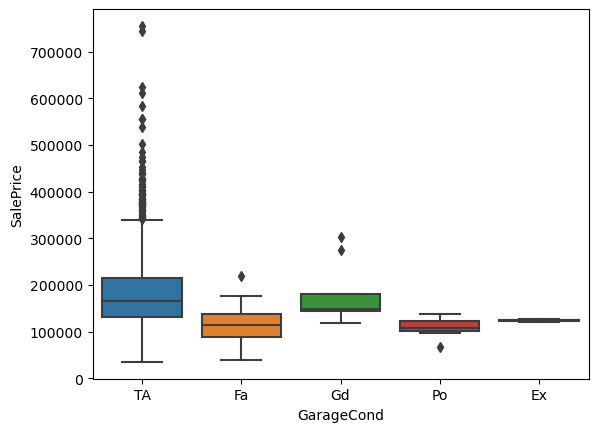

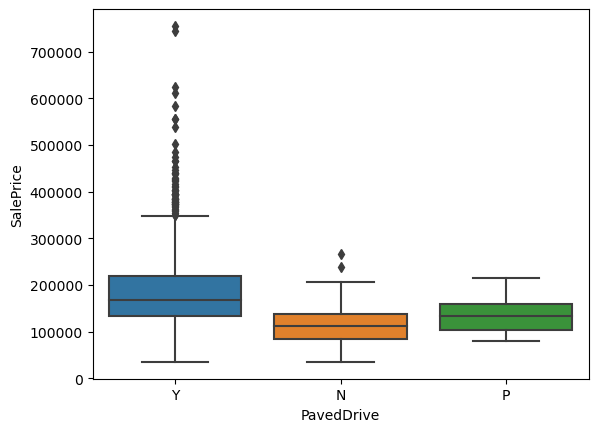

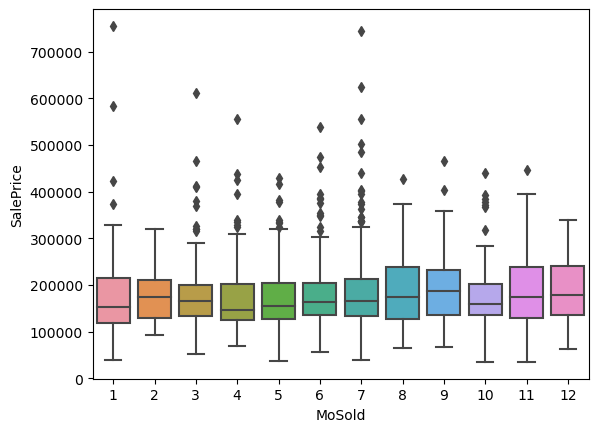

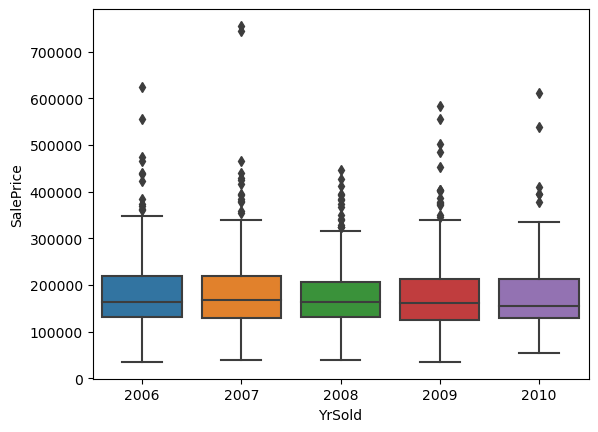

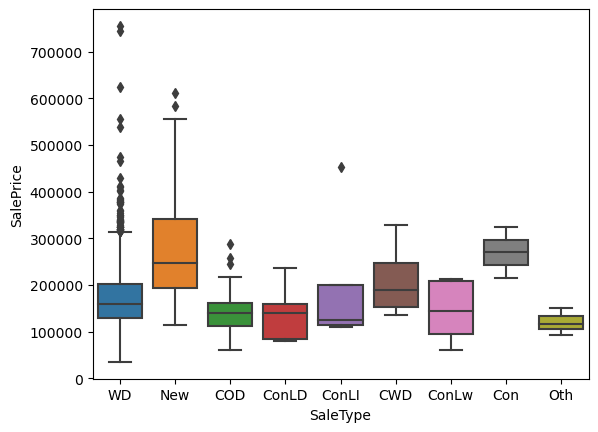

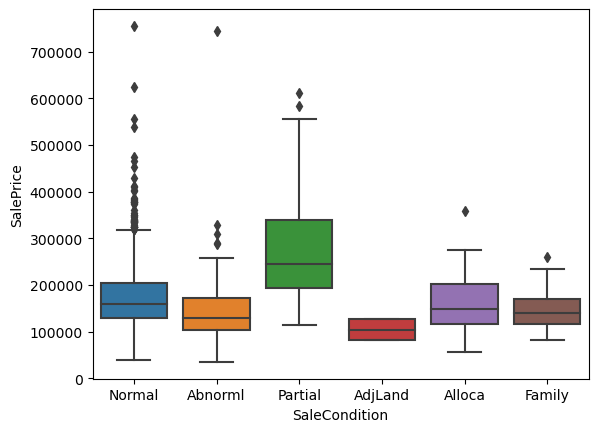

In [37]:
# creating boxplots
for i in df_cat:
    sns.boxplot(x = df_clean[i], y = df_clean['SalePrice'], data = df_clean)
    
    plt.show()


### 3: Data Preparation

In [38]:
df_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [39]:
## all the categorical columns

col_categorical = df_clean.select_dtypes(include=['object'])
col_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,2,2008,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,2,TA,TA,Y,5,2007,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,9,2008,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,3,TA,TA,Y,2,2006,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,3,TA,TA,Y,12,2008,WD,Normal


In [40]:
## Get (n-1) dummay variables for all the categorical columns using drop_first = True
cat_dummies = pd.get_dummies(col_categorical, drop_first=True)
cat_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [41]:
# Drop categorical variable as we have created the dummies for them
df_clean = df_clean.drop(list(col_categorical.columns), axis=1)

In [42]:
df_clean.shape

(1460, 22)

In [43]:
# concat dummy variables with main dataframe
df_clean = pd.concat([df_clean, cat_dummies], axis=1)

In [44]:
df_clean.shape

(1460, 288)

In [45]:
### Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_clean, train_size=0.7, test_size=0.3, random_state=100)

#### Rescaling the Features 

In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 288 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(19), uint8(266)
memory usage: 673.9 KB


In [47]:
df_clean.select_dtypes(include=['int','float']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')

In [48]:
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()    ## MinMaxScaler() can also be used, trying StandardScaler() this time

# Create a list of the variables that you need to scale
## Applying scaler() to all the numerical (int, float) columns except 'dummy' variables

num_vars=['MSSubClass', 'LotFrontage', 'LotArea',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
# Scale these variables using 'fit_transform' for training dataset
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

In [49]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.657071,-0.123555,-0.473765,-0.560537,0.043512,-0.293313,-0.374367,-0.430911,-0.765065,-0.787597,...,0,0,0,0,1,0,0,0,1,0
318,0.035976,0.918688,-0.056845,0.807462,1.160345,-0.293313,-0.454644,0.621579,0.511914,2.140556,...,0,0,0,0,1,0,0,0,1,0
239,-0.195040,-0.803279,-0.169324,-0.560537,-0.761296,-0.293313,0.171964,-0.712011,-0.930972,0.795996,...,0,0,0,0,1,0,0,0,1,0
986,-0.195040,-0.486074,-0.502297,-0.560537,-0.963574,-0.293313,-0.175904,-1.256778,-0.420683,0.669584,...,0,0,0,0,1,0,0,0,1,0
1416,3.039179,-0.440759,0.082905,-0.560537,-0.963574,-0.293313,0.475233,-0.620490,0.195183,1.611926,...,0,0,0,0,1,0,0,0,1,0


In [50]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,-5.118878e-17,-5.140083e-16,1.034590e-16,-1.564751e-16,-4.066831e-17,2.154115e-16,1.229292e-16,4.697516e-17,-2.370506e-16,7.377927e-17,...,0.002938,0.003918,0.078355,0.002938,0.870715,0.002938,0.007835,0.013712,0.825661,0.078355
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,0.054153,0.062500,0.268860,0.054153,0.335680,0.054153,0.088214,0.116350,0.379587,0.268860
min,-8.880864e-01,-2.208041e+00,-8.742840e-01,-5.605372e-01,-9.635738e-01,-2.933126e-01,-1.257417e+00,-2.313626e+00,-2.001824e+00,-7.875971e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.880864e-01,-4.407593e-01,-2.950018e-01,-5.605372e-01,-9.635738e-01,-2.933126e-01,-7.757532e-01,-5.856252e-01,-7.374138e-01,-7.875971e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.950396e-01,1.465366e-02,-9.566430e-02,-5.605372e-01,-1.200318e-01,-2.933126e-01,-2.271922e-01,-1.519906e-01,-2.070153e-01,-7.875971e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.669916e-01,3.749091e-01,9.959718e-02,2.837747e-01,5.685740e-01,-2.933126e-01,5.399012e-01,5.496695e-01,6.376005e-01,8.833350e-01,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.039179e+00,1.102391e+01,1.987157e+01,7.989457e+00,1.118171e+01,8.338494e+00,3.951683e+00,1.100048e+01,8.857522e+00,3.958586e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and Y sets for the model building

In [51]:
y_train = df_train.pop('SalePrice') # response variable in Y
X_train = df_train  # predictors in variable X

In [52]:
from sklearn.feature_selection import RFE
# RFE with 60 features
lm2 = LinearRegression()

# Init the transformer
rfe1 = RFE(estimator=lm2, n_features_to_select=60)

# Fit to the training data
rfe1.fit(X_train, y_train)
# Fit with 60 features


# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  


[False False False False False False False False  True  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False  True  True  True False False False False False False False False
 False False False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False  True  True  True  True  True  True  True  True  True False
 False  True False False False False False False False False False False
  True False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [54]:
col2 = X_train.columns[rfe1.support_]
col2

Index(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'Neighborhood_NoRidge', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8',
       'OverallQual_9', 'OverallQual_10', 'OverallCond_2', 'OverallCond_3',
       'OverallCond_4', 'OverallCond_5', 'OverallCond_6', 'OverallCond_7',
       'OverallCond_8', 'OverallCond_9', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'BsmtCond_Po', 'Heating_OthW', 'Heating_Wall',
       'FullBath_3', 'BedroomAbvGr_8', 'KitchenAbvGr_1', 'KitchenAbvGr_2',
       'KitchenAbvGr_3', 'TotRmsAbvGrd_11', 'TotRmsAbvGrd_14',
       'Functional_Sev', 'Functional_Typ', 'GarageQual_Fa', 'GarageQual

### 4. Model Building and Evaluation

#### Building linear model


In [55]:
lm = LinearRegression()

# Fit a line
lm.fit(X_train[col2], y_train)

LinearRegression()

In [56]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-8.243243127488856
[ 0.29100185  0.08863512 -0.0510408   0.28559899  0.30022541 -2.12142021
 -6.01312802 -1.51013832 -0.56622639 -0.58884678 -0.55437093 -0.48948856
 -0.38899643 -0.13228061  0.34761587  1.12114884  1.99776901  0.22322945
 -0.29067367 -0.07054418  0.14389264  0.09581832  0.16224823  0.23302582
  0.24932742  1.50878288  7.80776697  8.73245652  8.41628334  7.941641
  8.09330521  7.13220285  8.61806851 -0.29576715 -0.16729874 -0.29576715
 -0.16729874 -0.74632403 -1.59137327  0.23121988  0.30547585  0.02046047
  0.4067734  -0.16222184 -0.24455156 -0.2512429   0.02046047 -1.31609547
  0.28901118 -0.27984968  0.06555468 -0.15974887 -0.09578029 -0.11257629
 -0.21096037 -0.09227917 -0.05400832  0.63364969  0.18695546  0.18695546]


#### Applying the scaling on the test sets

In [57]:
df_test[num_vars]

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
1436,20,60.000000,9000,0.0,616,0,248,864,864,0,...,1974.0,528,0,0,0,0,0,0,0,120500
57,60,89.000000,11645,0.0,0,0,860,860,860,860,...,2004.0,565,0,70,0,0,0,0,0,196500
780,20,63.000000,7875,38.0,0,0,1237,1237,1253,0,...,1995.0,402,220,21,0,0,0,0,0,176000
382,60,79.000000,9245,0.0,0,0,939,939,939,858,...,2006.0,639,144,53,0,0,0,0,0,213500
1170,80,76.000000,9880,0.0,522,0,574,1096,1118,0,...,1977.0,358,203,0,0,0,0,576,0,171000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,20,80.000000,9600,132.0,991,0,50,1041,1041,0,...,1959.0,270,224,88,0,0,0,0,0,124500
555,45,58.000000,6380,0.0,0,0,993,993,1048,0,...,1922.0,280,0,0,116,0,0,0,0,113000
399,60,65.000000,8125,100.0,812,0,280,1092,1112,438,...,2007.0,438,0,168,0,0,0,0,0,241000
545,50,70.049958,13837,178.0,1002,202,0,1204,1377,806,...,1988.0,786,0,0,0,0,0,0,0,229000


In [58]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Split the 'df_test' set into X_test and y_test

In [59]:
y_test = df_test.pop('SalePrice')
X_test = df_test[col2]

In [60]:
from sklearn.metrics import r2_score, mean_squared_error

In [61]:
y_pred_train = lm.predict(X_train[col2])
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8851098431760184
0.7725725890261413
117.30285011728519
102.57725932228428
0.11489015682398157
0.2341946559869504


## Ridge and Lasso Regression

Let's now try predicting sale prices performing ridge and lasso regression.

### Ridge Regression

In [62]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[col2], y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [77]:
#Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[col2], y_train)
print(ridge.coef_)

[ 0.24874118  0.07495638 -0.05343365  0.24257439  0.49060342 -0.15508473
 -0.8627305  -0.02022218 -0.24558335 -0.47879059 -0.57208352 -0.50531361
 -0.36987824 -0.07827676  0.39310758  1.11001404  0.9308624   0.08252267
 -0.2997162  -0.12278289  0.10208003  0.04425624  0.10758735  0.1484235
  0.12168726  0.18551123  0.19200956  0.20585776  0.1452535   0.06593873
  0.15864792  0.00333702  0.6631389  -0.09842038 -0.05499636 -0.09842038
 -0.05499636 -0.18405796 -0.30761816  0.03566645  0.4256948   0.03449084
  0.25096115 -0.23185292 -0.01910823 -0.41667154  0.03449084 -0.18813605
  0.2277182  -0.14435738  0.07372607 -0.00951565  0.04037948 -0.03103585
 -0.0413608  -0.02398726  0.05661643  0.20672905  0.15328071  0.15328071]


In [78]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train[col2])
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8129802942660441
0.8107929150636594
190.9471195543689
85.33863237514211
0.18701970573395582
0.19483706021721944


### Lasso

In [79]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[col2], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [81]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[col2], y_train) 

Lasso(alpha=0.002)

In [82]:
lasso.coef_

array([ 1.73552541e-01,  0.00000000e+00, -6.01993607e-02,  3.19395346e-01,
        4.75971909e-01, -0.00000000e+00, -2.63153761e+00,  0.00000000e+00,
       -0.00000000e+00, -1.54482533e-01, -2.32287068e-01, -1.42707341e-01,
       -0.00000000e+00,  3.02965699e-01,  7.93114727e-01,  1.59665833e+00,
        1.60556079e+00,  0.00000000e+00, -3.02634398e-01, -1.46524098e-01,
        2.31928144e-02, -1.50393891e-02,  2.31218913e-02,  4.14715330e-02,
        0.00000000e+00,  0.00000000e+00,  6.86666697e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        6.33514493e-01, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        4.09613145e-01,  0.00000000e+00,  4.47403556e-01, -0.00000000e+00,
       -0.00000000e+00, -1.88338417e-01,  0.00000000e+00, -0.00000000e+00,
        2.05692862e-01, -1.53499703e-01,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [83]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train[col2])
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.82027819065073
0.8069550126389695
183.49596734560458
87.06965288223603
0.17972180934926993
0.1987891618315891


In [71]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.885110,0.823687,0.830035
1,R2 Score (Test),0.772573,0.811337,0.796665
2,RSS (Train),117.302850,180.015875,173.534743
3,RSS (Test),102.577259,85.093272,91.710609
4,MSE (Train),0.338955,0.419897,0.412269
5,MSE (Test),0.483937,0.440769,0.457586


In [72]:
## changes in the coefficients after regularization

In [84]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.885110,0.812980,0.820278
1,R2 Score (Test),0.772573,0.810793,0.806955
2,RSS (Train),117.302850,190.947120,183.495967
3,RSS (Test),102.577259,85.338632,87.069653
4,MSE (Train),0.338955,0.432458,0.423936
5,MSE (Test),0.483937,0.441404,0.445858


In [73]:
betas = pd.DataFrame(index=X_train[col2].columns)

In [74]:
betas.rows = X_train[col2].columns

In [75]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [89]:
pd.set_option('display.max_rows', None)
betas.sort_values(by='Ridge')

,Linear,Ridge,Lasso
Condition2_PosN,-6.013128,-1.471159,-3.865114
OverallQual_4,-0.554371,-0.593394,-0.235659
OverallQual_3,-0.588847,-0.551640,-0.197816
Heating_OthW,-1.591373,-0.516716,-0.532955
OverallQual_5,-0.489489,-0.512938,-0.143628
TotRmsAbvGrd_11,-0.251243,-0.451990,-0.177528
OverallQual_2,-0.566226,-0.372960,-0.000000
OverallQual_6,-0.388996,-0.368947,0.000000
Condition2_PosA,-2.121420,-0.335348,-0.094265
Functional_Sev,-1.316095,-0.312486,-0.000000
